In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.metrics import adjusted_rand_score,normalized_mutual_info_score,roc_auc_score,average_precision_score
from scipy.cluster.hierarchy import dendrogram,ward
from scipy.io import loadmat
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=loadmat('annthyroid.mat');X,y=data['X'],data['y']
data_scaled=StandardScaler().fit_transform(X)

# Task 1

## Task 1.1

### Plot features jointly

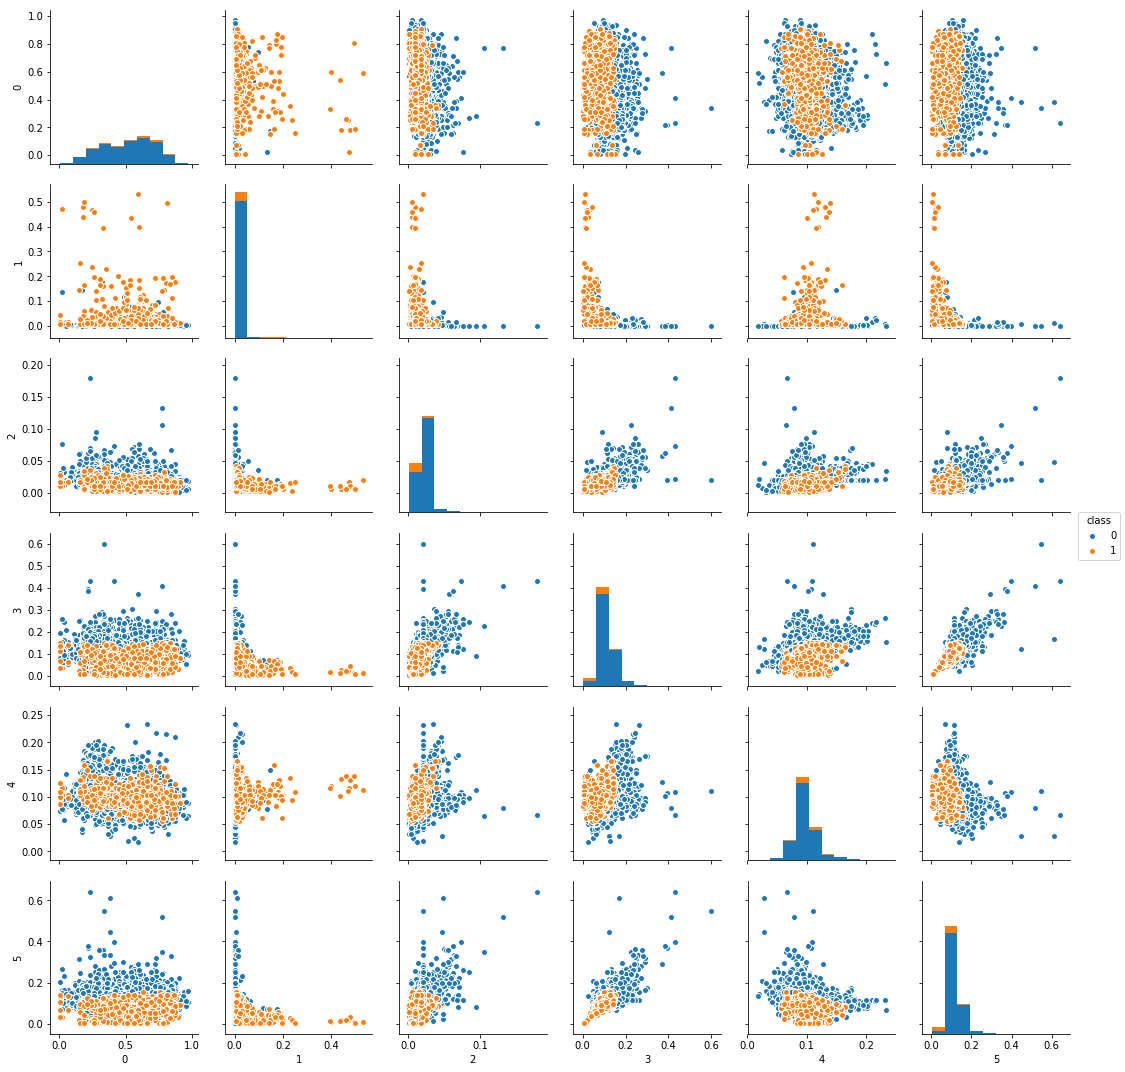

In [3]:
df0=pd.DataFrame(X);df0['class']=y
sns.pairplot(df0,vars=df0.columns[:6],hue='class')

### Plot the features for each class

#### Class 0:

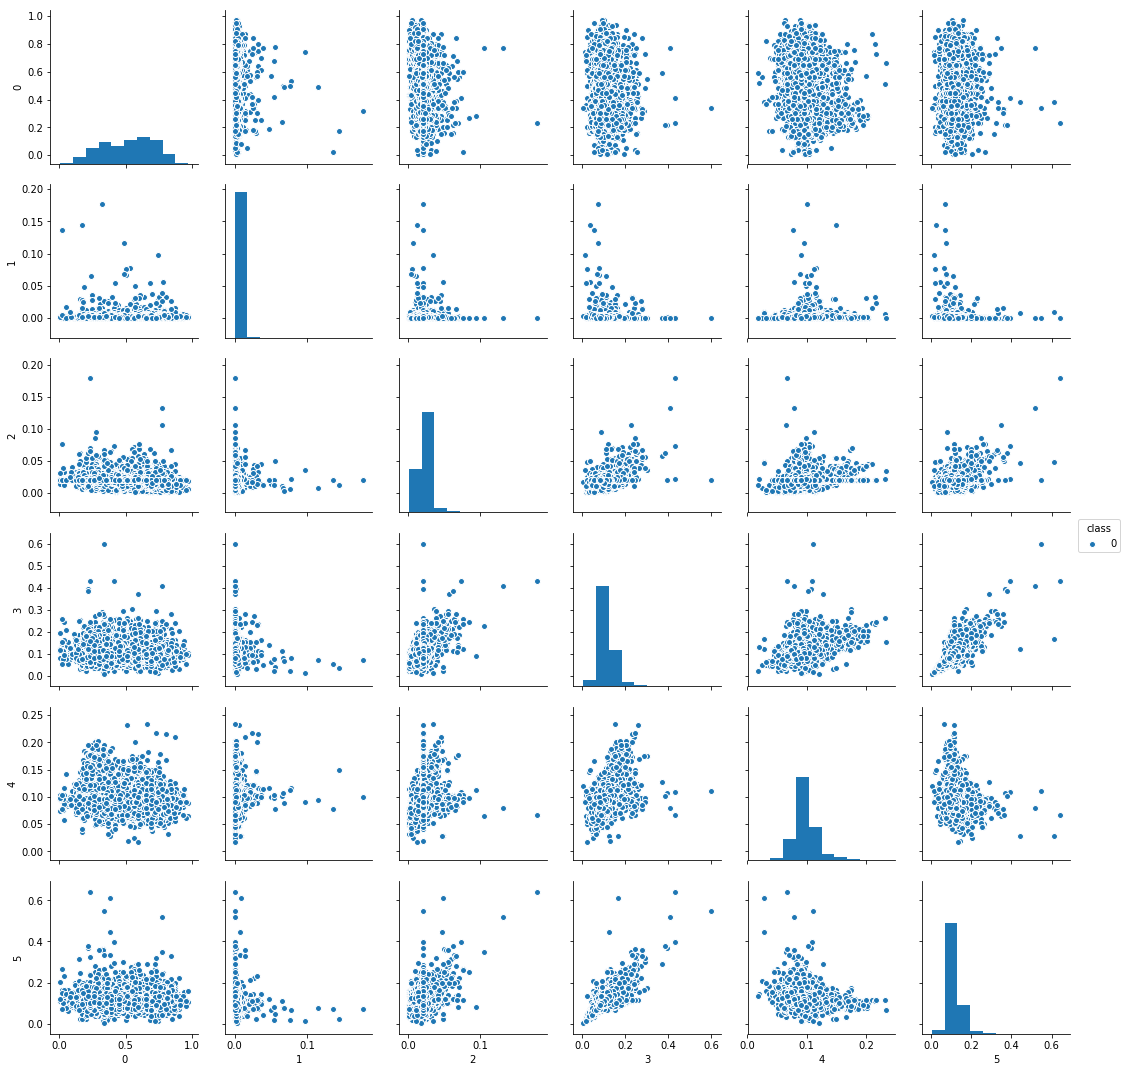

In [4]:
df1=df0[df0['class']==0]
sns.pairplot(df1,vars=df1.columns[:6],hue='class')

#### Class 1

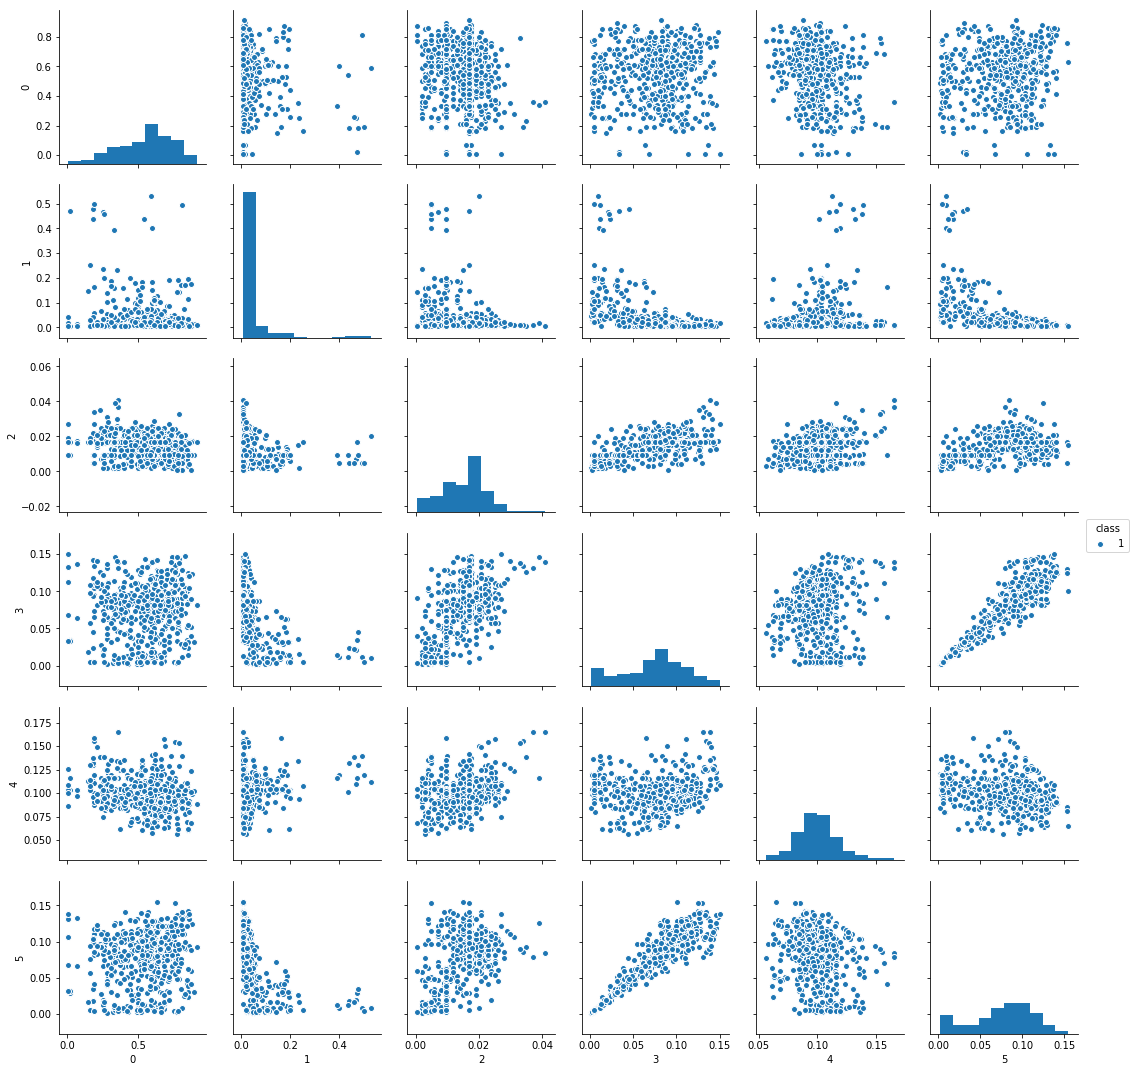

In [5]:
df2=df0[df0['class']==1]
sns.pairplot(df2,vars=df2.columns[:6],hue='class')

### PCA Visualization

In [6]:
pipe=make_pipeline(StandardScaler(),PCA(n_components=2))
pca_data=pipe.fit_transform(X)

#### Jointly

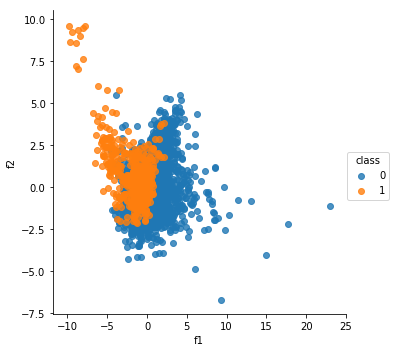

In [7]:
pca_data=pd.DataFrame(pca_data,columns=['f1','f2'])
pca_data['class']=y
sns.lmplot(x='f1',y='f2',data=pca_data,fit_reg=False,hue='class')

#### Separately:

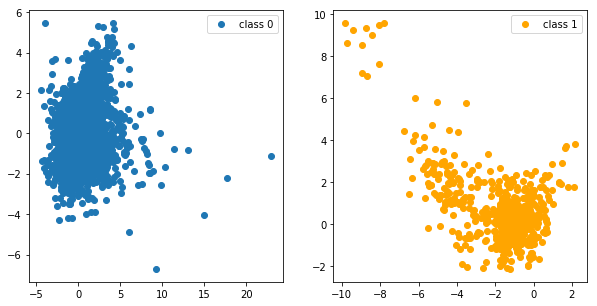

In [8]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pca_data1=pca_data[pca_data['class']==0];pca_data2=pca_data[pca_data['class']==1]
ax[0].scatter(pca_data1['f1'],pca_data1['f2'],label='class 0');ax[0].legend()
ax[1].scatter(pca_data2['f1'],pca_data2['f2'],label='class 1',c='orange');ax[1].legend()

### Variance Ratio

In [9]:
pca_var=PCA()
pca_var.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(0, 1)

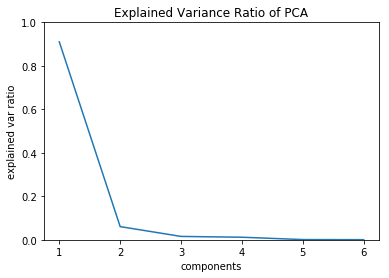

In [10]:
fig,ax=plt.subplots()
ax.plot(range(1,pca_var.n_components_+1),pca_var.explained_variance_ratio_)
ax.set_xlabel('components');ax.set_ylabel('explained var ratio')
ax.set_title('Explained Variance Ratio of PCA')
ax.set_ylim(0,1)

**As we can see, 2 would be a good enough threshold for the number of
principal components since the first two components have explained away over 90% of the variance. That would generally be enough for compression.**

## Task 1.2

In [252]:
tsne_5 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 5);digits_tsne_5 = tsne_5.fit_transform(data_scaled)
tsne_10 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 10);digits_tsne_10 = tsne_10.fit_transform(data_scaled)
tsne_20 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 20);digits_tsne_20 = tsne_20.fit_transform(data_scaled)
tsne_30 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 30);digits_tsne_30 = tsne_30.fit_transform(data_scaled)
tsne_40 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 40);digits_tsne_40 = tsne_40.fit_transform(data_scaled)
tsne_50 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 50);digits_tsne_50 = tsne_50.fit_transform(data_scaled)

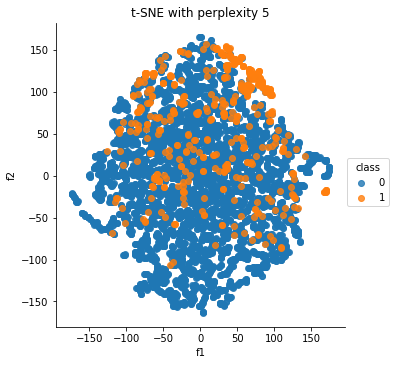

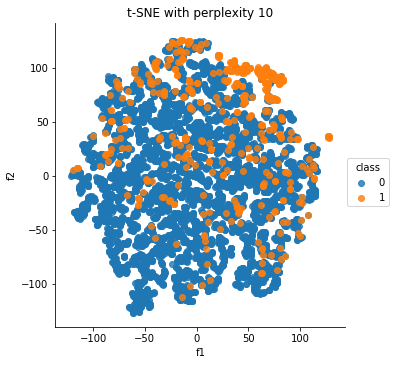

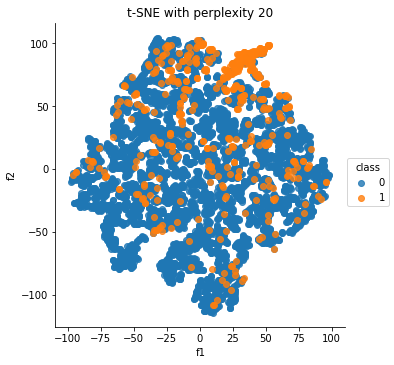

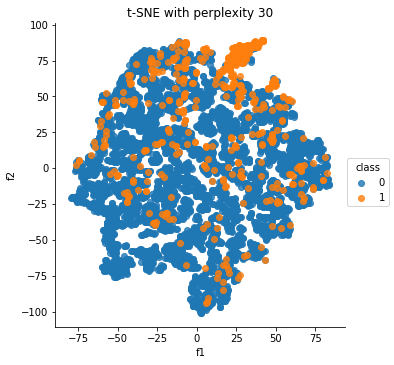

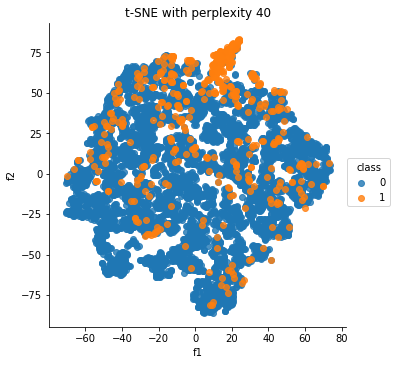

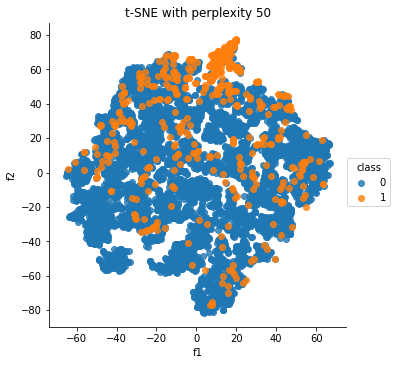

In [254]:
tsne_list=[digits_tsne_5,digits_tsne_10,digits_tsne_20,digits_tsne_30,digits_tsne_40,digits_tsne_50]
perp_list=[5,10,20,30,40,50]
for i in range(len(perp_list)):   
    df_tsne=pd.DataFrame(tsne_list[i],columns=['f1','f2'])
    df_tsne['class']=y
    sns.lmplot(x='f1',y='f2',data=df_tsne,fit_reg=False,hue='class')
    plt.title('t-SNE with perplexity %d'%perp_list[i])

**We can see that when perplexity is 30, 40, 50, class 1 mainly concentrates on the top corner and can be separated quite clearly.**

# Task 2

In [12]:
pca=PCA(n_components=2)
data=loadmat('annthyroid.mat')

## Task 2.1

### KMeans

**For KMeans, we first scaled the data, then tried KMeans with the number of cluster to be 2,3,4 respectively and plotted scatter matrix to have a general result.**

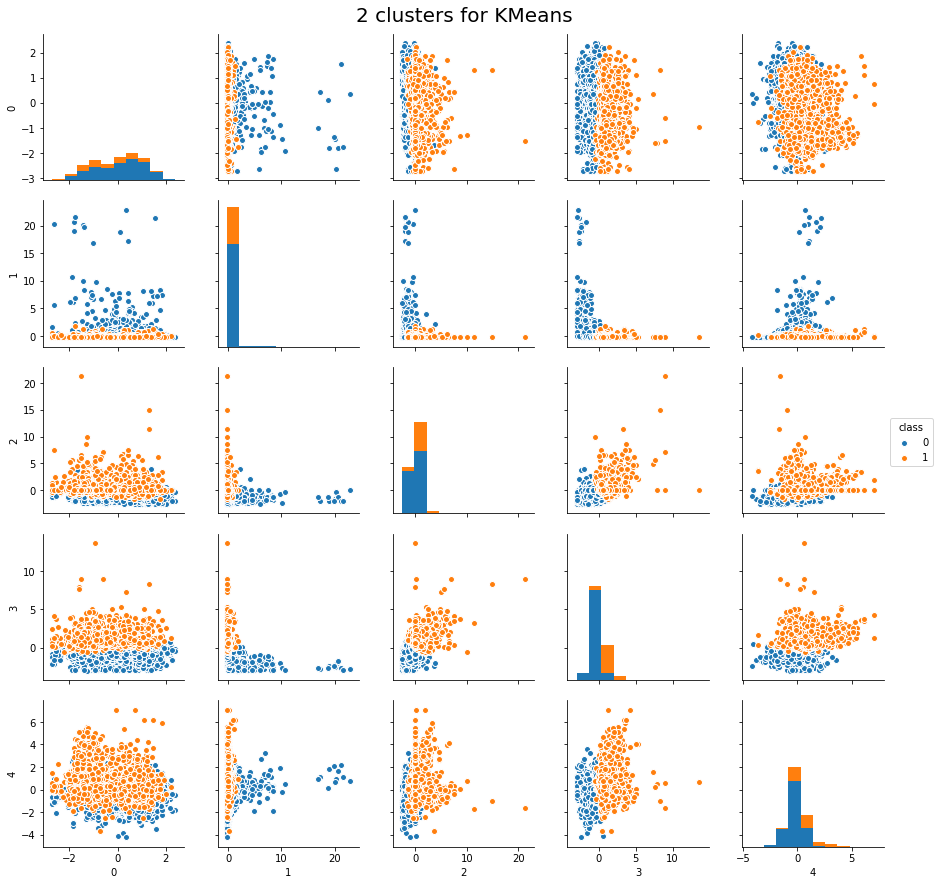

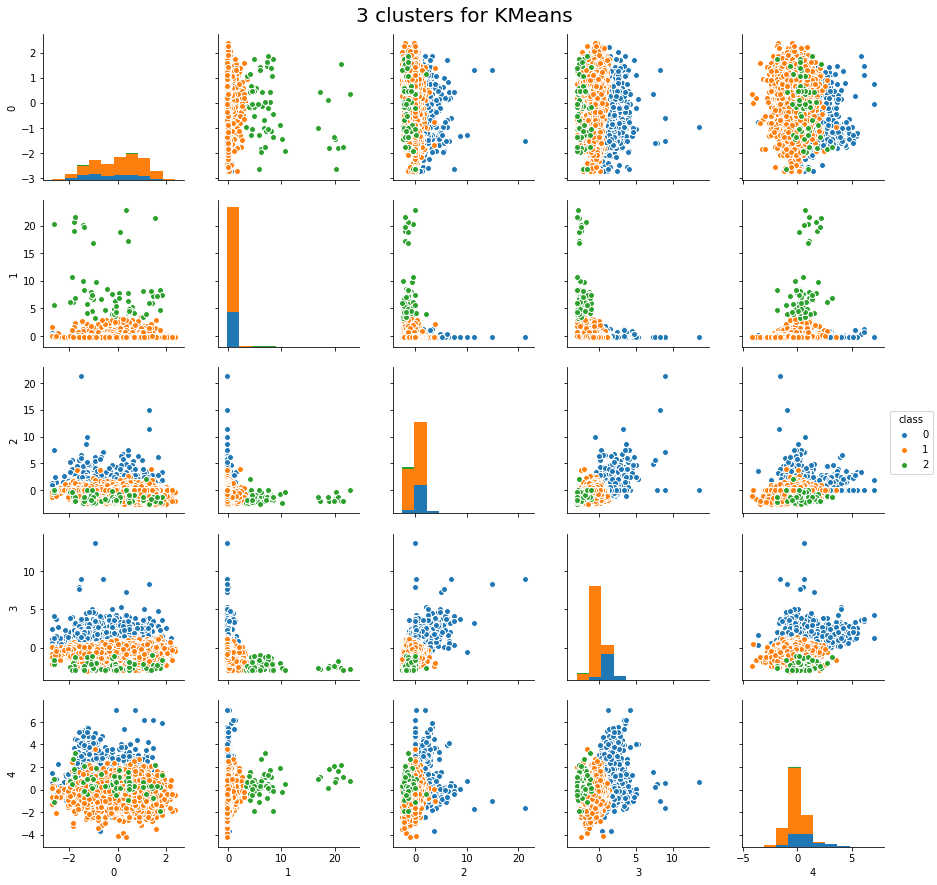

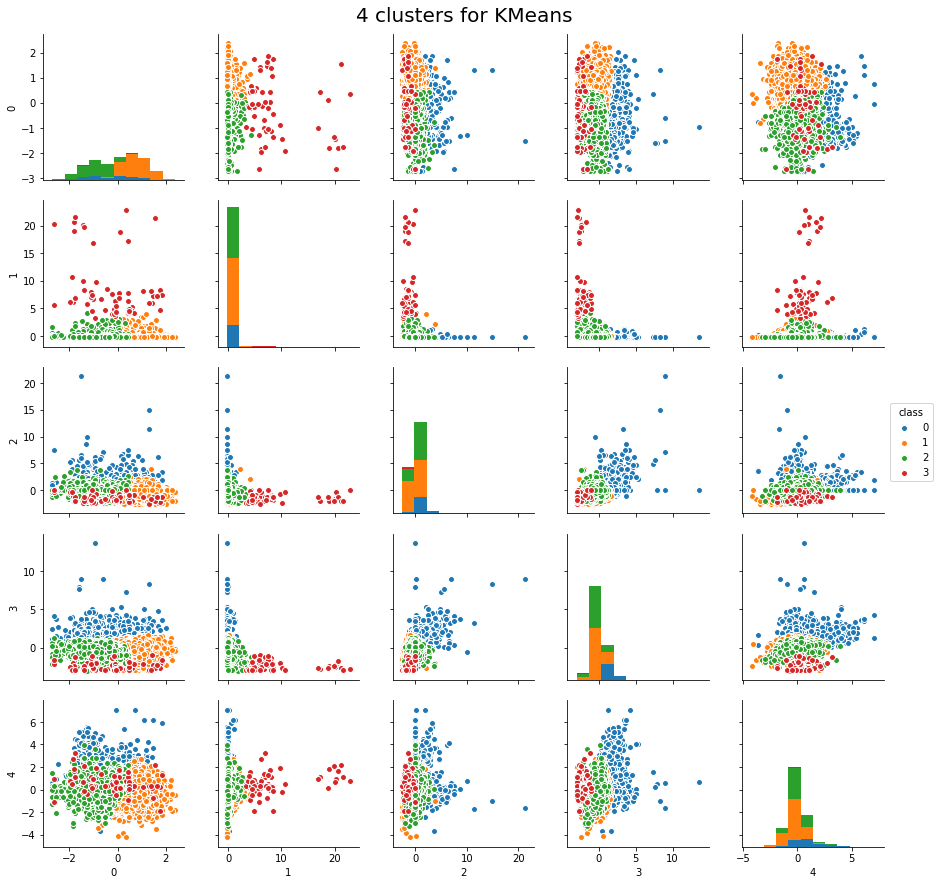

In [13]:
data_scaled=StandardScaler().fit_transform(data['X'])
for i in range(2,5):
    km=KMeans(n_clusters=i,random_state=0)
    c=km.fit_predict(data_scaled)
    d_temp=pd.DataFrame(data_scaled)
    d_temp['class']=c
    sns.pairplot(data=d_temp,vars=d_temp.columns[:5],hue='class')
    plt.subplots_adjust(top=0.95)
    plt.suptitle('%d clusters for KMeans' %i,fontsize=20)

**In order to get a clearer sense of the performace of KMeans clustering, we used scaled data, applied PCA to get the first two components, and the showed the scatter plot of the resulting graph for 2,3,4 clusters. For each number of clusters, we also tried different number of initializations to see the stability of the result.**

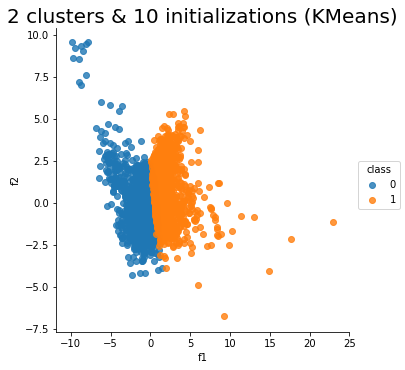

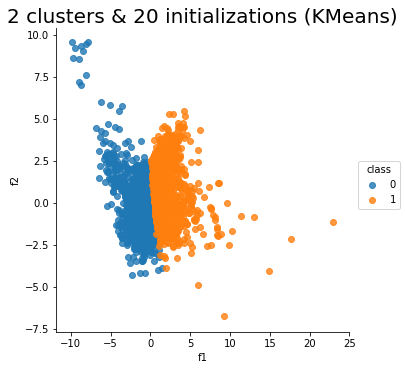

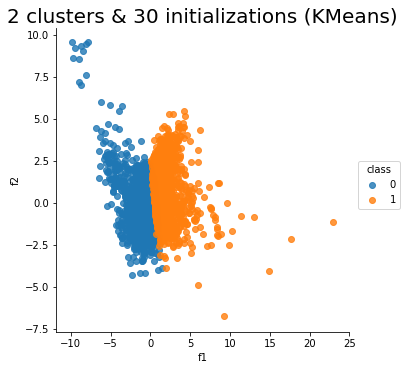

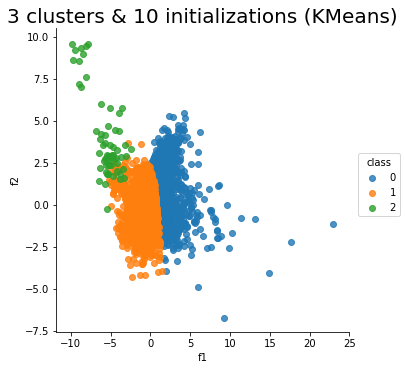

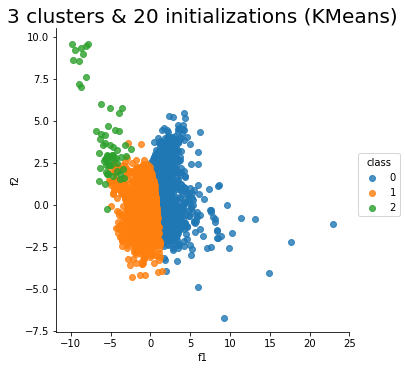

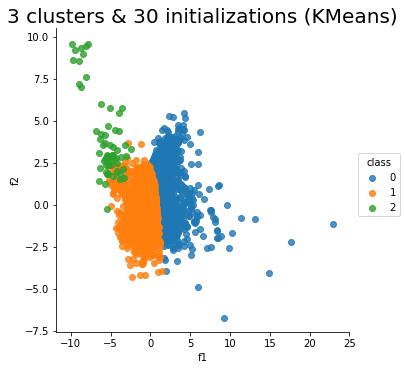

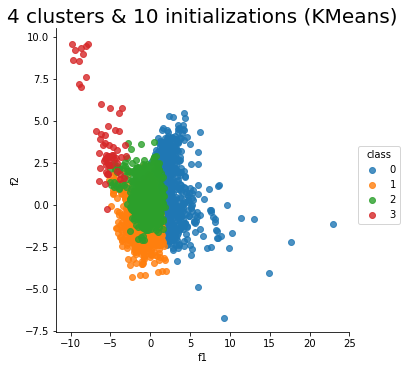

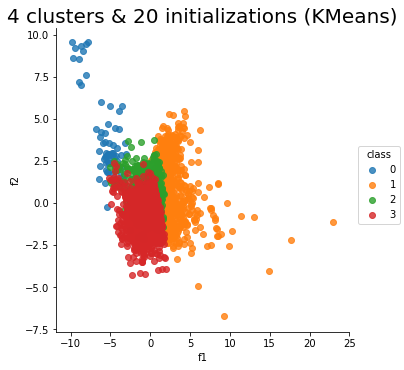

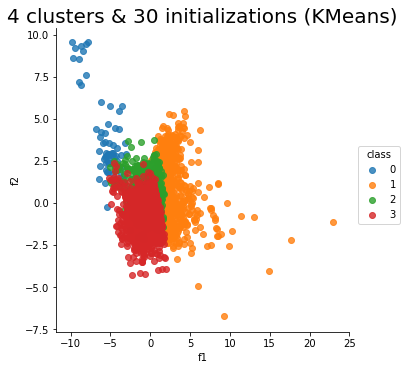

In [14]:
data_pca=pca.fit_transform(data_scaled)
pred_result_km={}
for i in range(2,5):
    for j in [10,20,30]:
        km=KMeans(n_clusters=i,n_init=j,random_state=0)
        c=km.fit_predict(data_scaled)
        dic_lab='%d_clst_%d_init'%(i,j)
        pred_result_km[dic_lab]=c
        d_temp=pd.DataFrame(data_pca,columns=['f1','f2'])
        d_temp['class']=c
        sns.lmplot(data=d_temp,x='f1',y='f2',hue='class',fit_reg=False,legend=True)
        plt.title('%d clusters & %d initializations (KMeans)'%(i,j),fontsize=20)

In [15]:
percentage_0=np.mean(pred_result_km['4_clst_30_init']==0)*100
percentage_1=np.mean(pred_result_km['4_clst_30_init']==1)*100
percentage_2=np.mean(pred_result_km['4_clst_30_init']==2)*100
percentage_3=np.mean(pred_result_km['4_clst_30_init']==3)*100
percentage=[percentage_0,percentage_1,percentage_2,percentage_3]
print('For 4 clusters & 30 initializations, the percentage of the smallest predicted class is only %.2f%%'%np.min(percentage))

For 4 clusters & 30 initializations, the percentage of the smallest predicted class is only 0.89%


**From the result of scatter plot, we can see that when the number of cluster is 2 or 3, the result of the clustering seems to be quite stable for different number of initializations. When the number of clusters is 2, the algorithm split the samples into halves and when the number of clusters is 3, it starts to capture the outliers at the upper left hand side from the graph. However, when the number of cluster is 4, as we can see, the result of the clustering becomes quite unstable and the size of the cluster also becomes a little unresonable. For 4 clusters & 30 initializations, the percentage of the smallest predicted class is only less than 1%. Therefore, without the knowledge of ground truth, it seems that when the number of clusters is 2 or 3, the result is more semantically meaningful.**

### Agglomerative Culsters

**For Agglomerative Clustering, we also scaled the data, then tried Agg Clustering with the number of cluster to be 2-8 respectively and plotted scatter matrix to have a general result.**

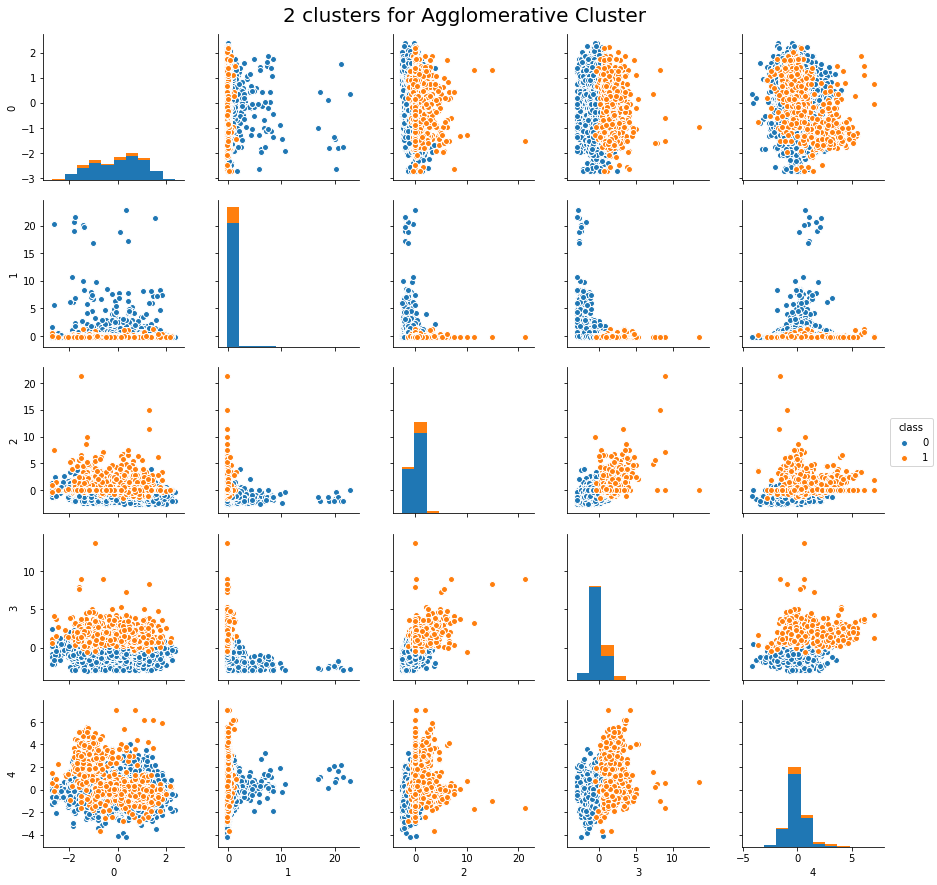

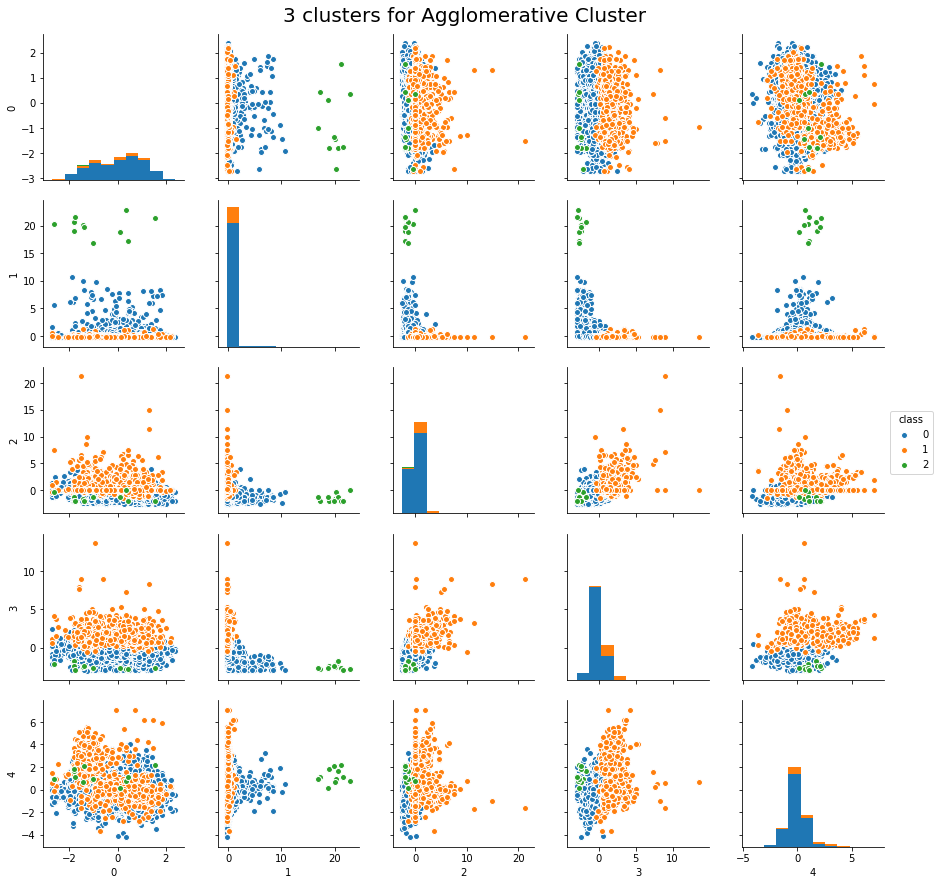

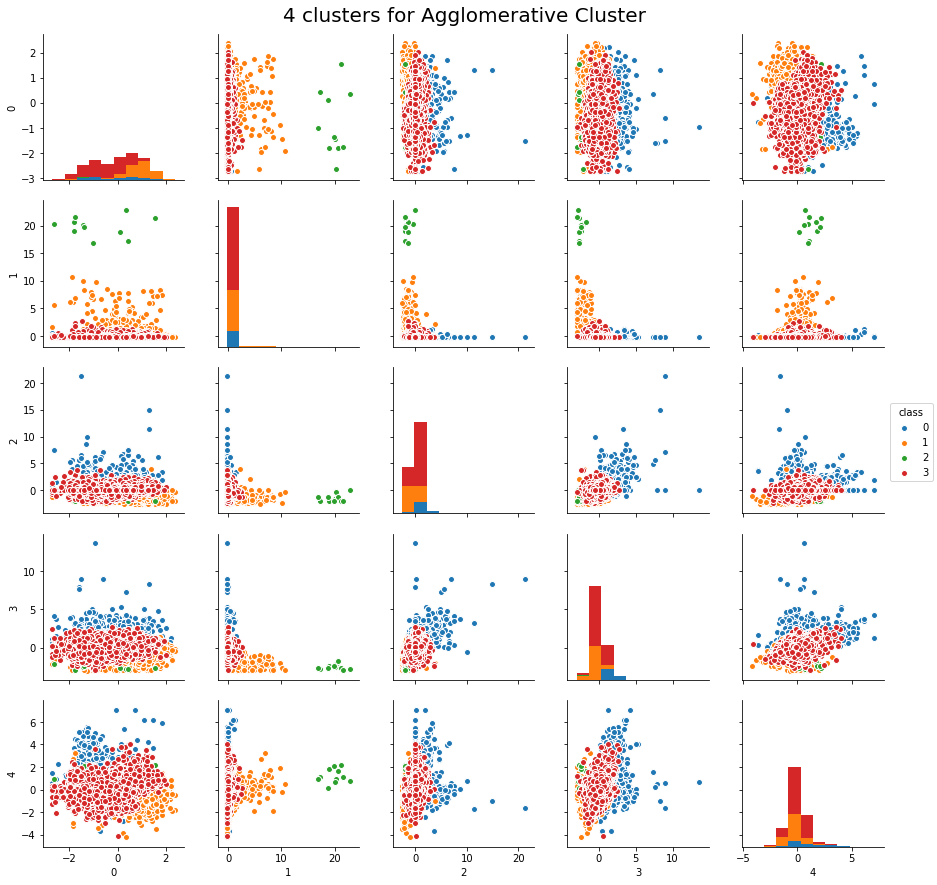

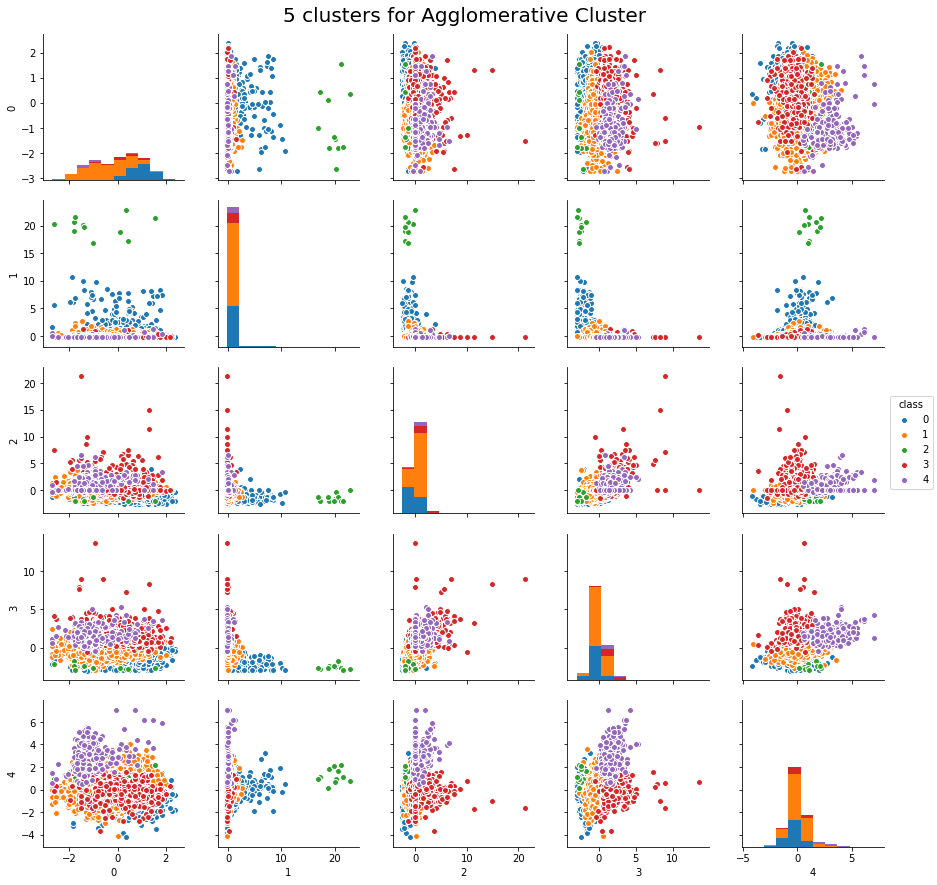

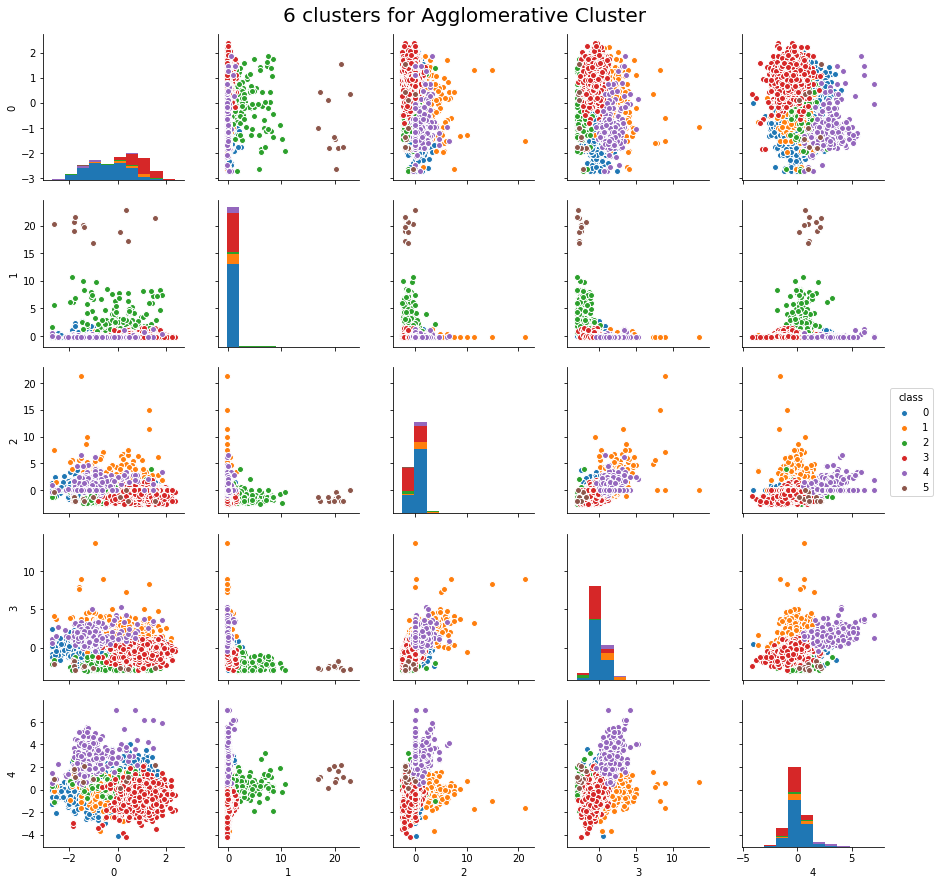

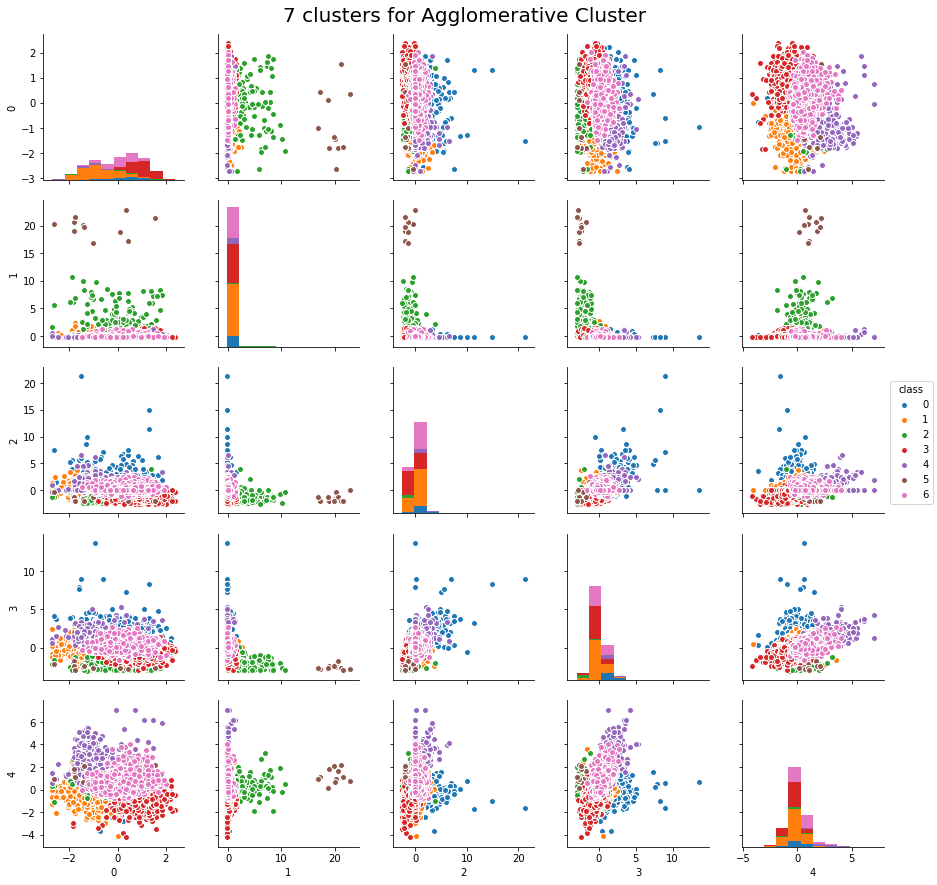

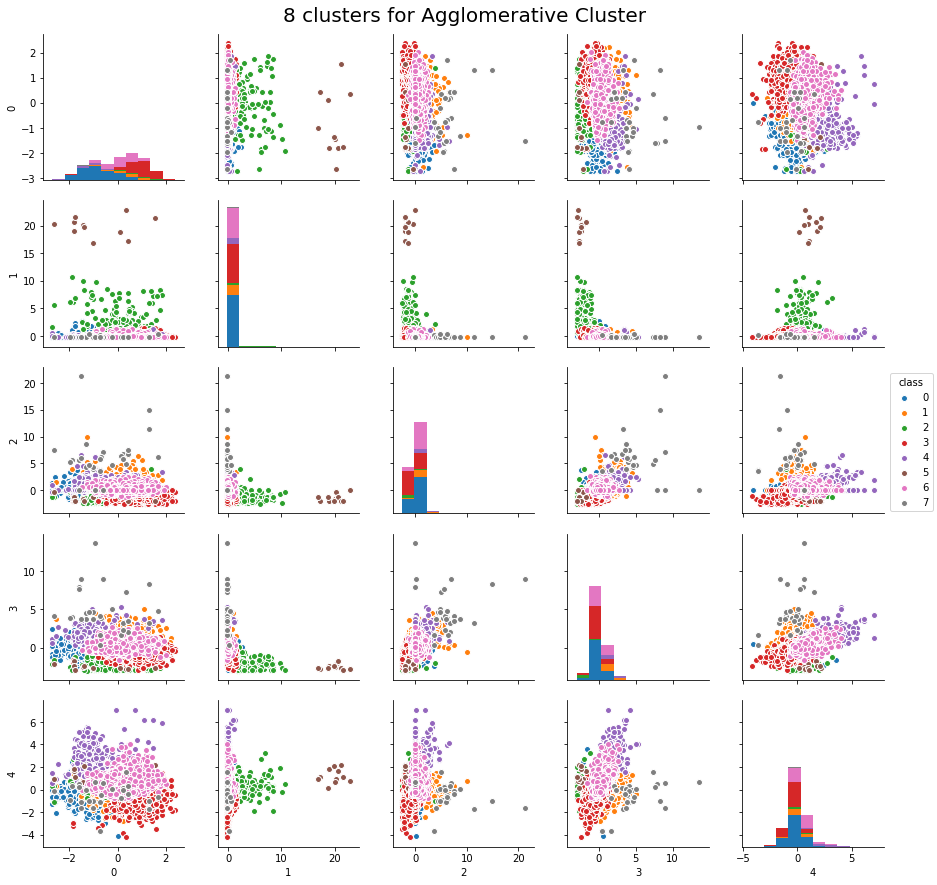

In [16]:
data_scaled=StandardScaler().fit_transform(data['X'])
for i in range(2,9):
    cls_agg=AgglomerativeClustering(n_clusters=i)
    c=cls_agg.fit_predict(data_scaled)
    d_temp=pd.DataFrame(data_scaled)
    d_temp['class']=c
    sns.pairplot(data=d_temp,vars=d_temp.columns[:5],hue='class')
    plt.subplots_adjust(top=0.95)
    plt.suptitle('%d clusters for Agglomerative Cluster' %i,fontsize=20)

**Again we used scaled data, applied PCA to get the first two components, and the showed the scatter plot of the resulting graph with prediction labels corresponding to different number of clusters.**

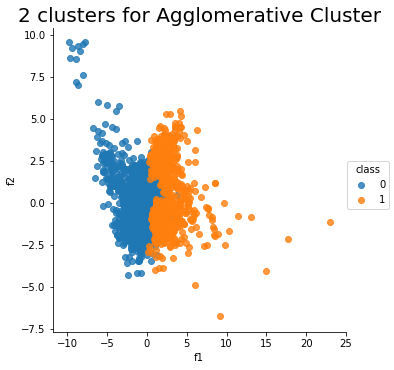

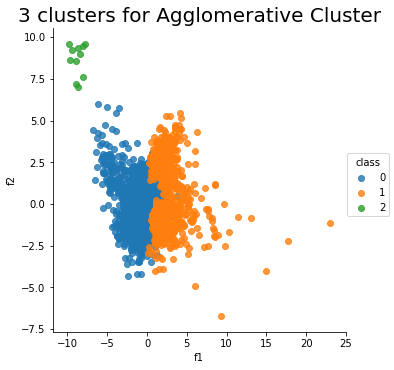

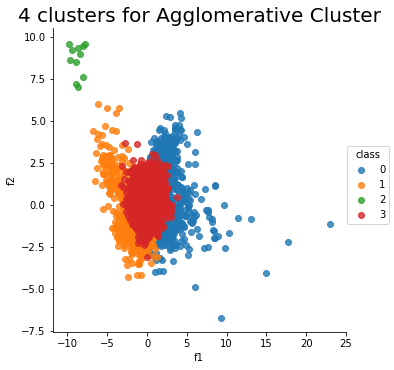

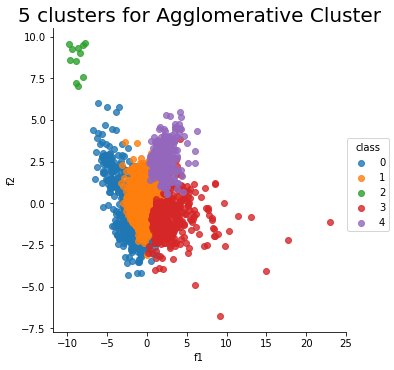

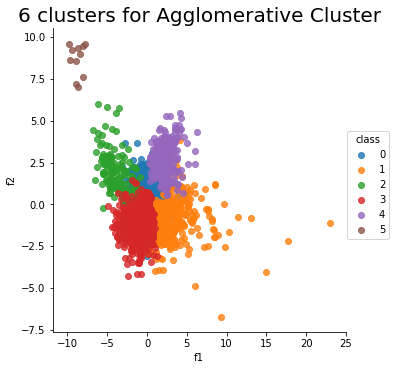

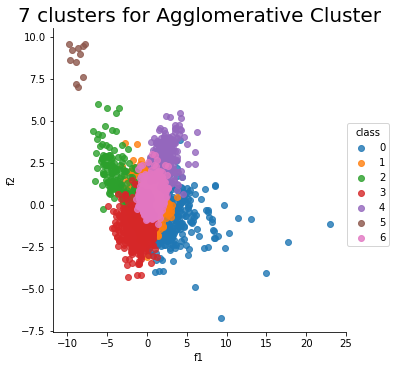

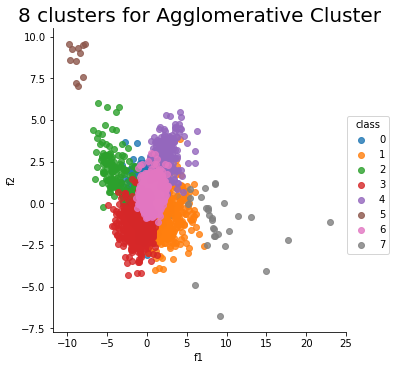

In [17]:
pred_result_agg={}
for i in range(2,9):
    cls_agg=AgglomerativeClustering(n_clusters=i)
    c=cls_agg.fit_predict(data_scaled)
    d_temp=pd.DataFrame(data_pca,columns=['f1','f2'])
    pred_result_agg['%d_clusters'%i]=c
    d_temp['class']=c
    sns.lmplot(data=d_temp,x='f1',y='f2',hue='class',fit_reg=False)
    plt.title('%d clusters for Agglomerative Cluster' %i,fontsize=20)

In [18]:
percentage_0=np.mean(pred_result_agg['4_clusters']==0)*100
percentage_1=np.mean(pred_result_agg['4_clusters']==1)*100
percentage_2=np.mean(pred_result_agg['4_clusters']==2)*100
percentage_3=np.mean(pred_result_agg['4_clusters']==3)*100
percentage=[percentage_0,percentage_1,percentage_2,percentage_3]
print('For 4 clusters, the percentage of the smallest predicted class is only %.2f%%'%np.min(percentage))

For 4 clusters, the percentage of the smallest predicted class is only 0.15%


**For each clustering, we used `ward` linkage. When the number of clusters is 2, the algorithm splits the samples into halves. When the number of clusters is 3, the algorithm captures the cluster on the upper left-hand side which probably is outlier. When the number of clusters is bigger than 3, however, the algorithm starts to create new clusters in the chunk of majority samples, and the proprotion of the smallest class is less than 0.5%, which seems not that reasonable. Therefore, it seems that when the number of clusters is 2 or 3, the result is more semantically meaningful.**

### DBSCAN

**For DBSCAN, we scaled the data, then tried with `eps` to be 2,4,5 and `min_samples` to be 2,3,4 respectively and plotted scatter matrix to have a general result.**

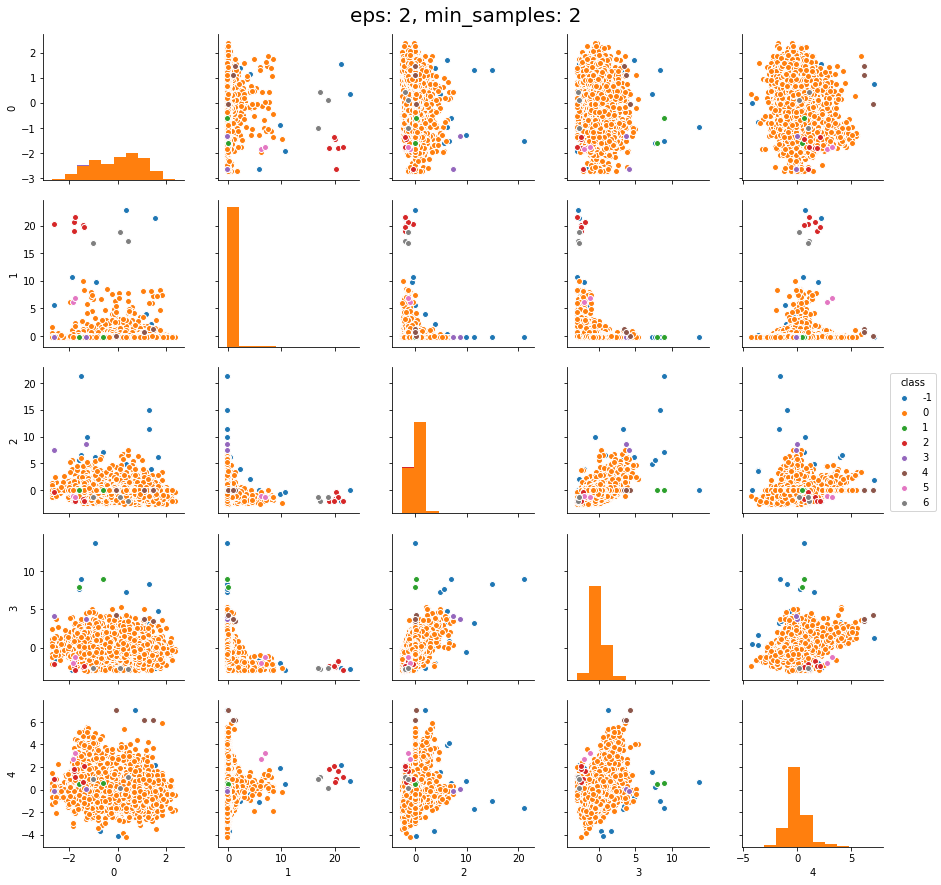

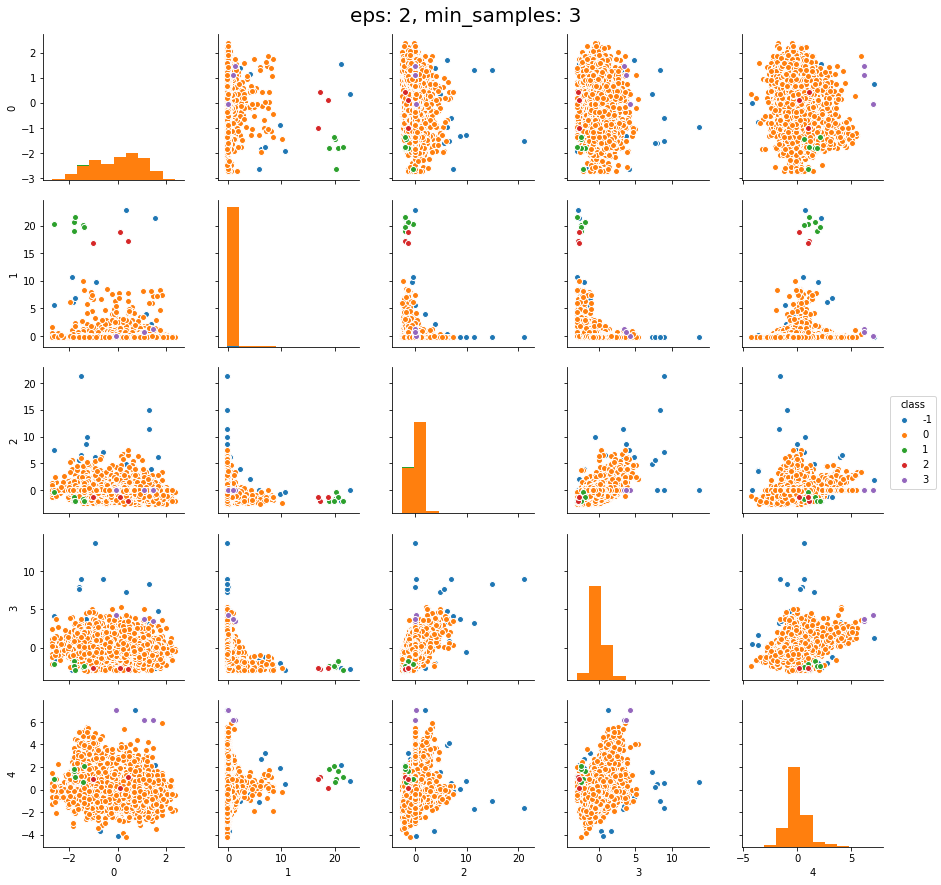

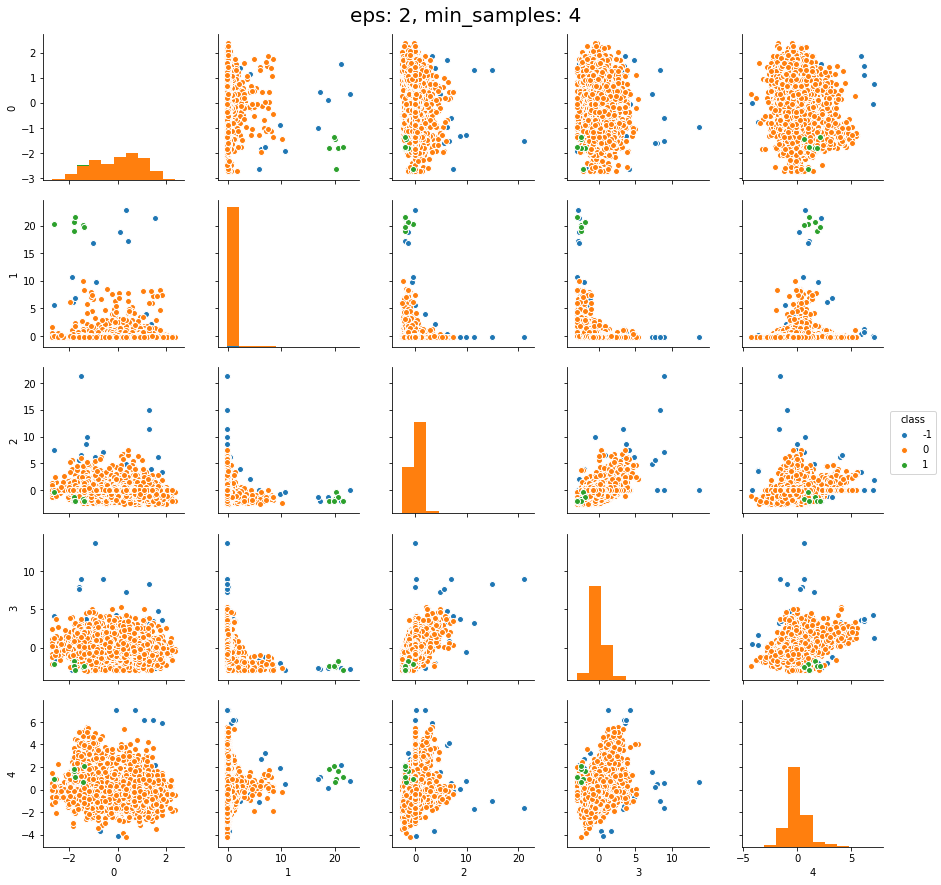

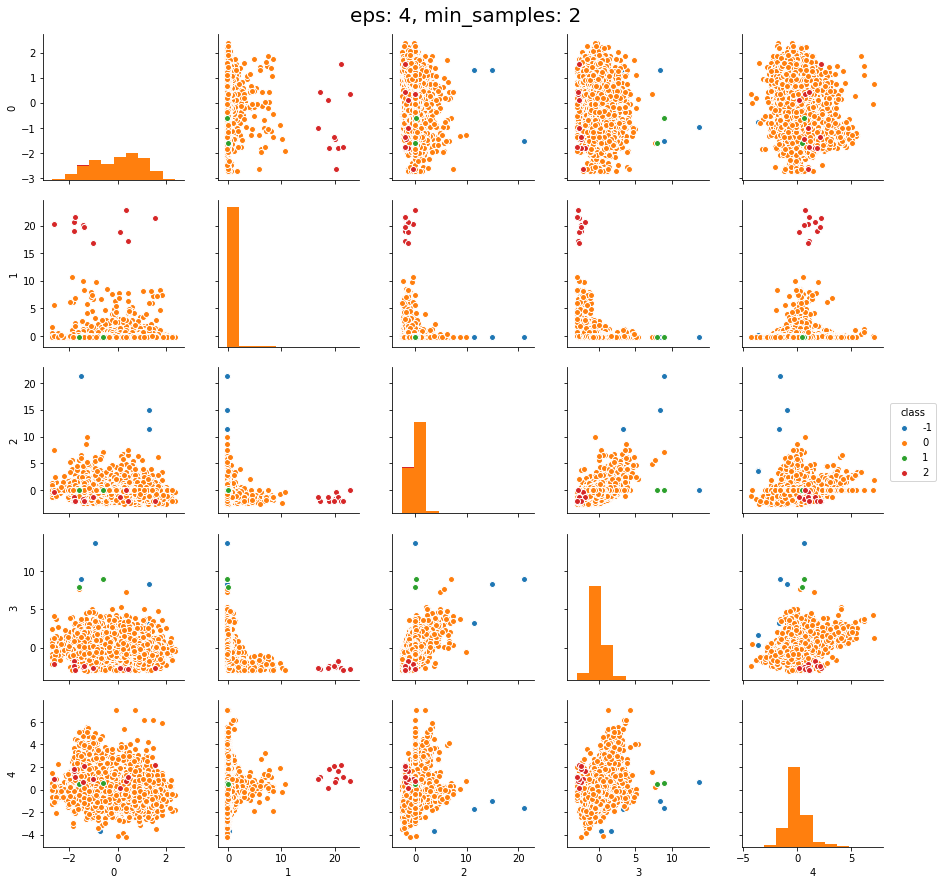

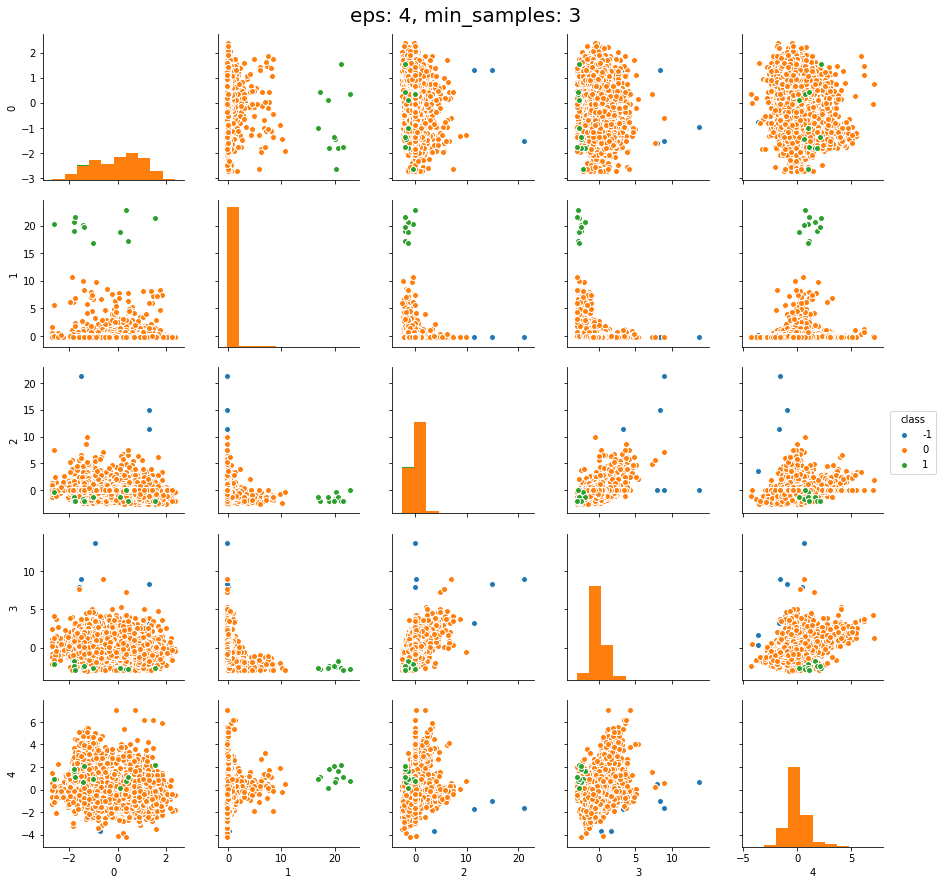

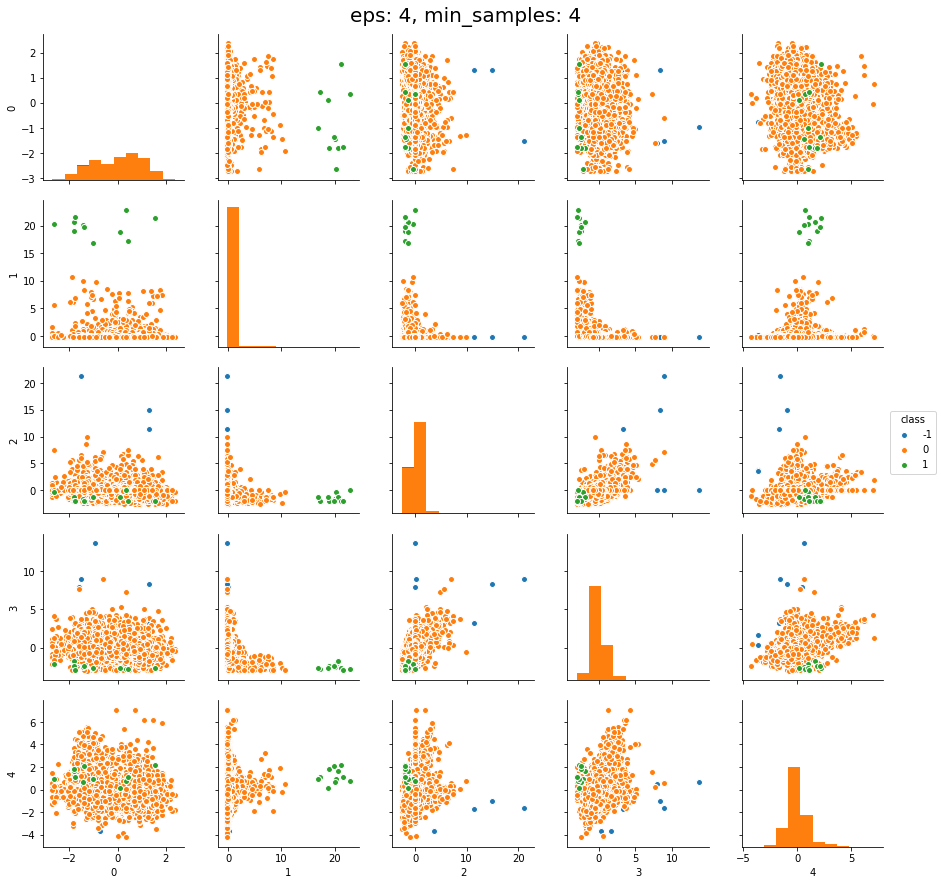

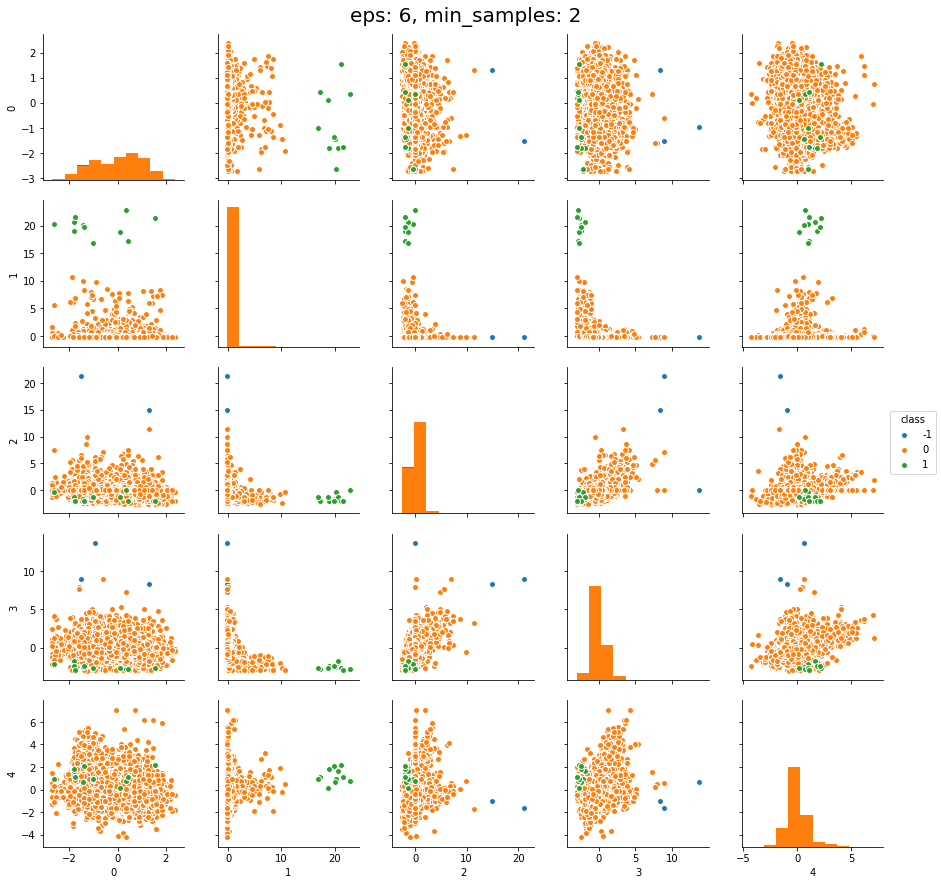

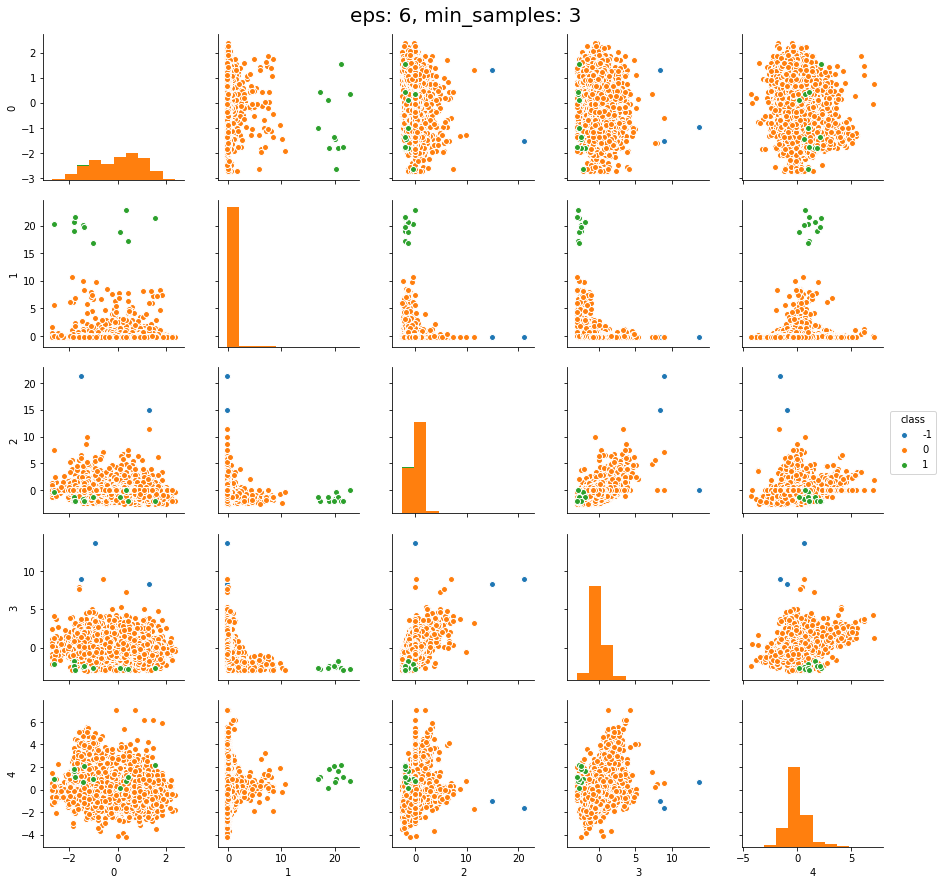

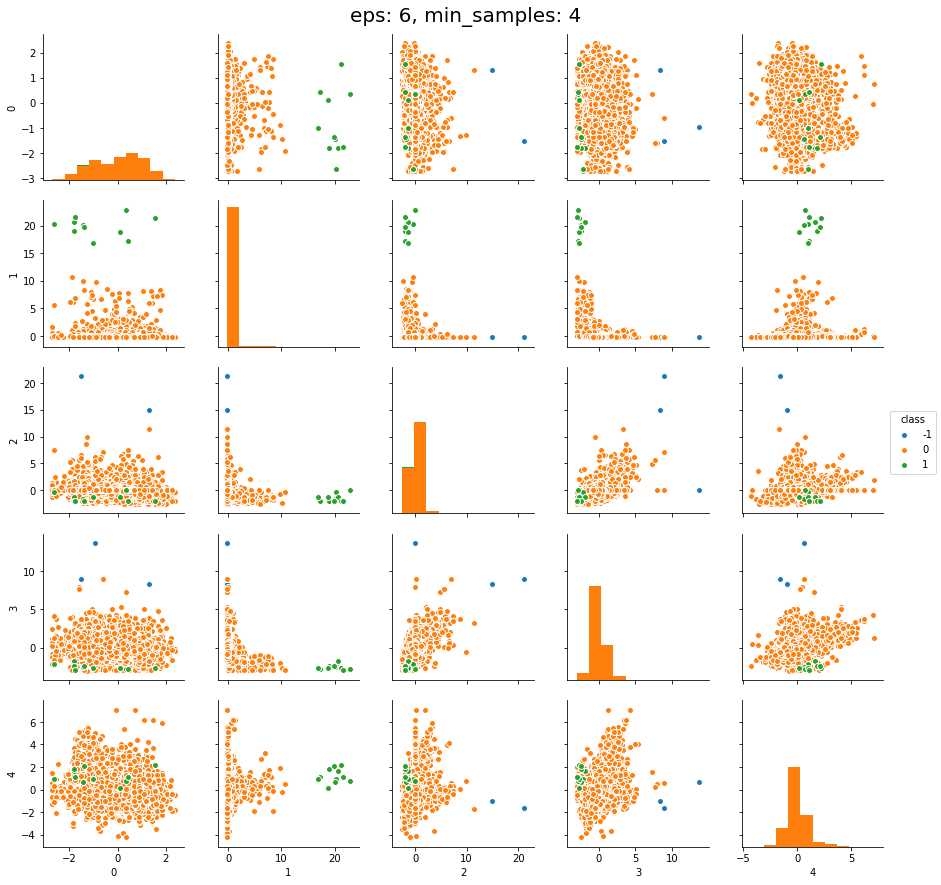

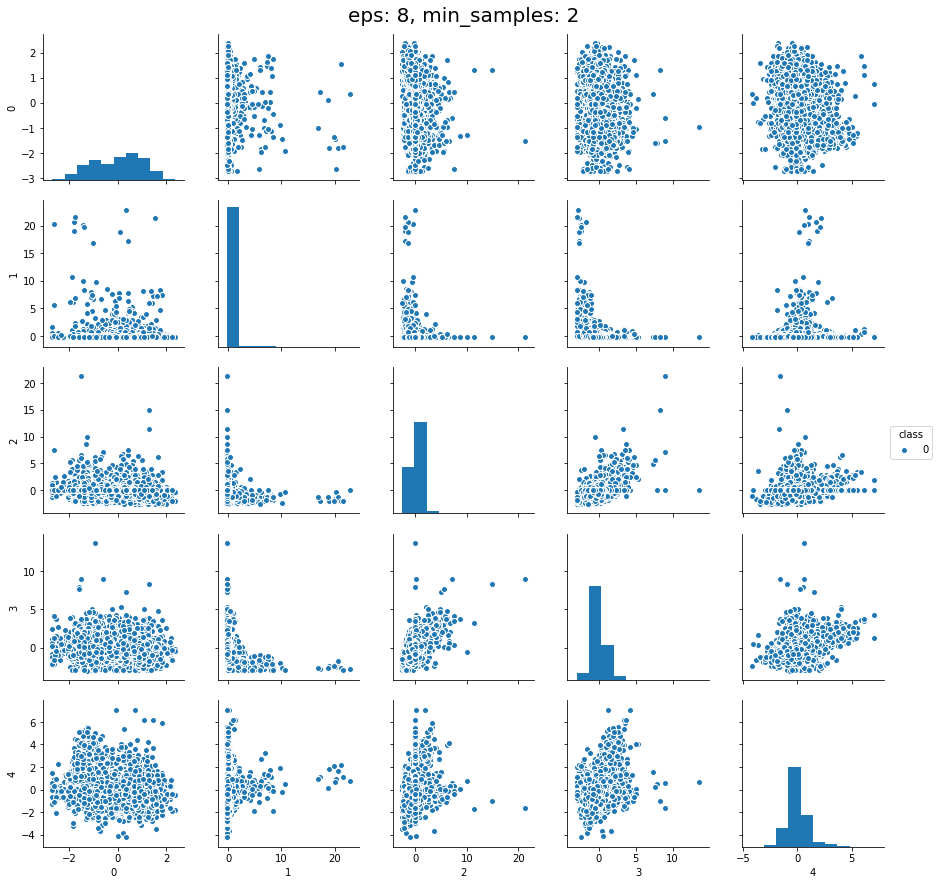

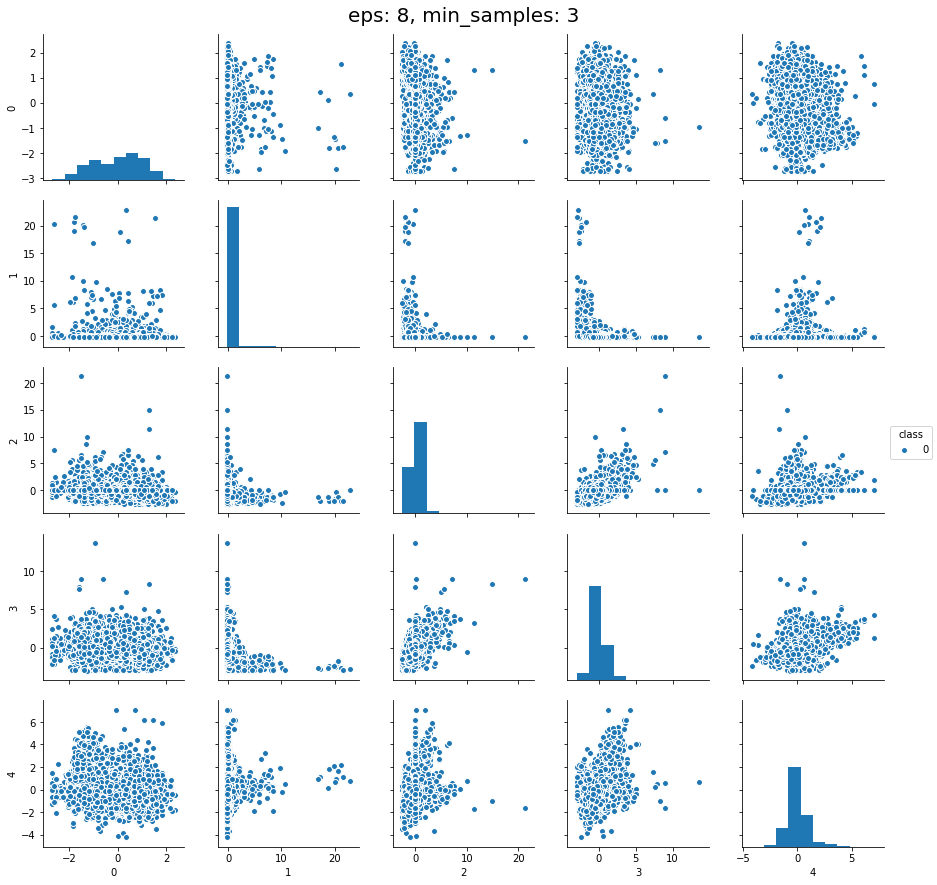

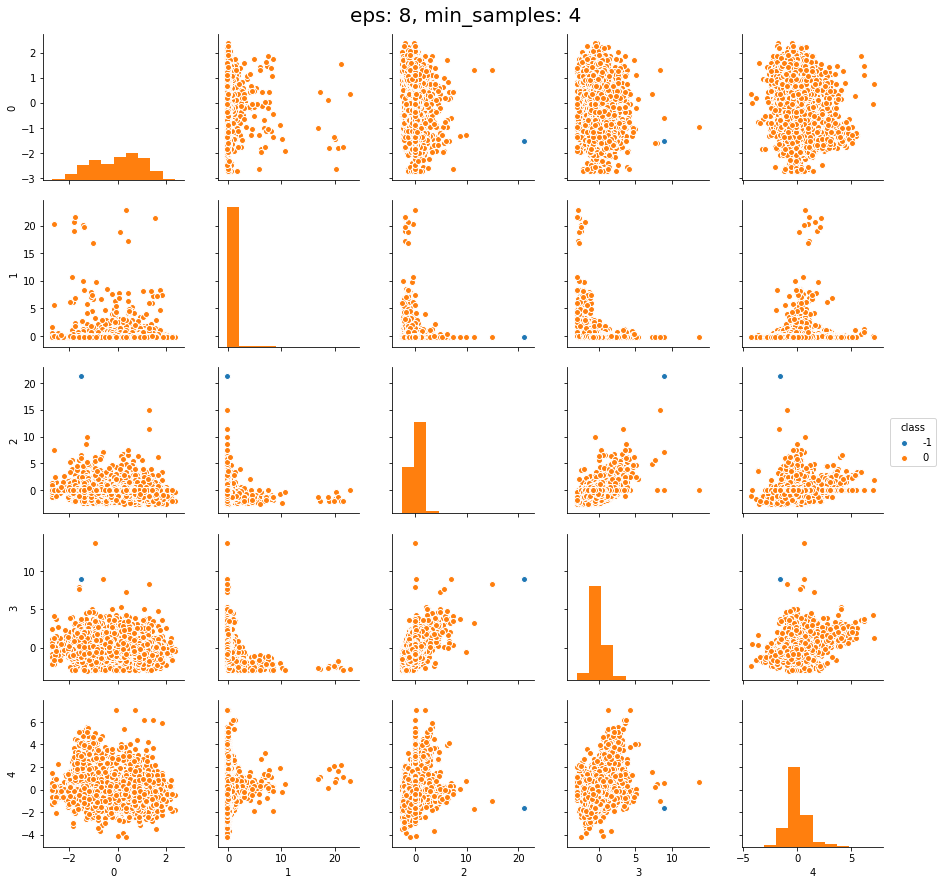

In [19]:
data_scaled=StandardScaler().fit_transform(data['X'])
for i in range(2,9,2):
    for j in range(2,5):
        dbs=DBSCAN(eps=i,min_samples=j)
        c=dbs.fit_predict(data_scaled)
        d_temp=pd.DataFrame(data_scaled)
        d_temp['class']=c
        sns.pairplot(data=d_temp,vars=d_temp.columns[:5],hue='class')
        plt.subplots_adjust(top=0.95)
        plt.suptitle('eps: %d, min_samples: %d' %(i,j),fontsize=20)

**We used scaled data, applied PCA to get the first two components, and the showed the scatter plot of the resulting graph for different parameters.**

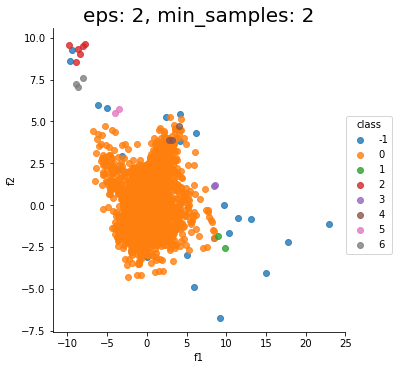

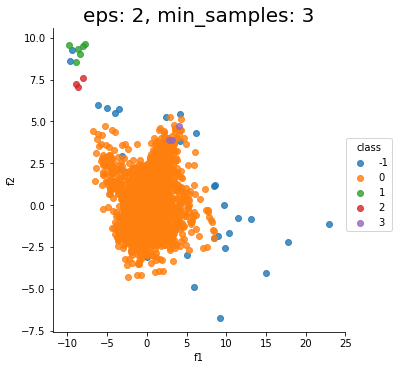

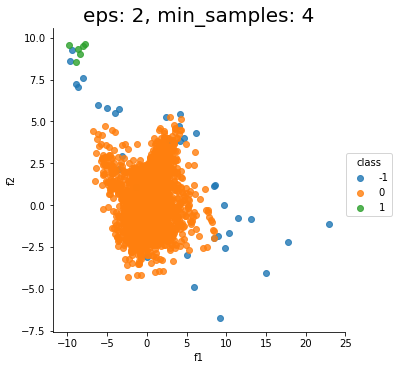

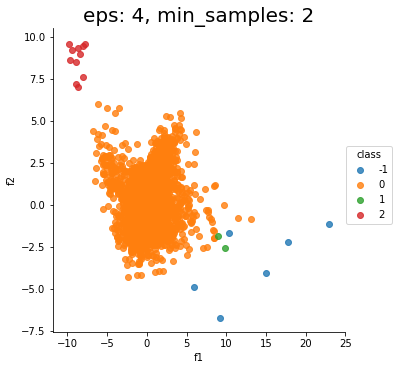

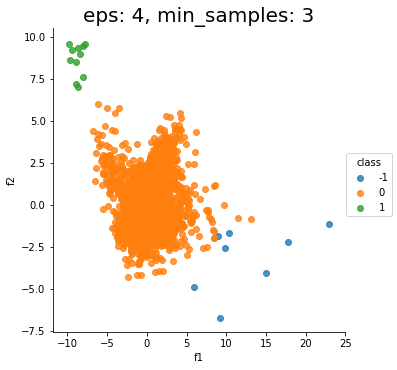

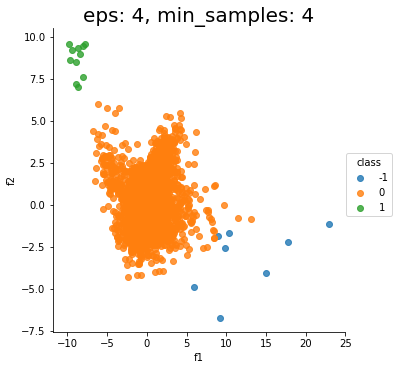

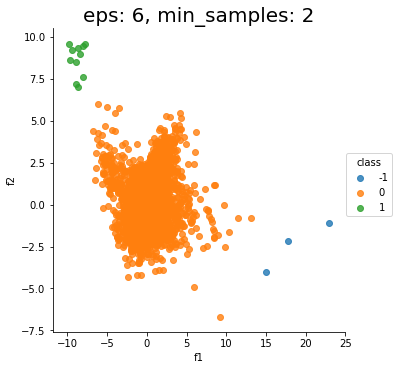

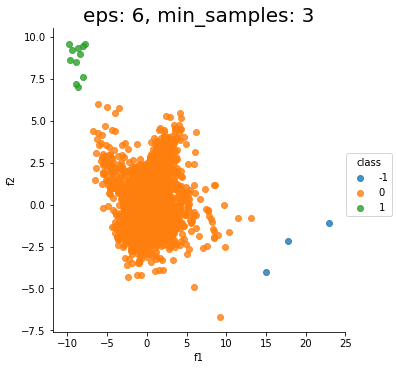

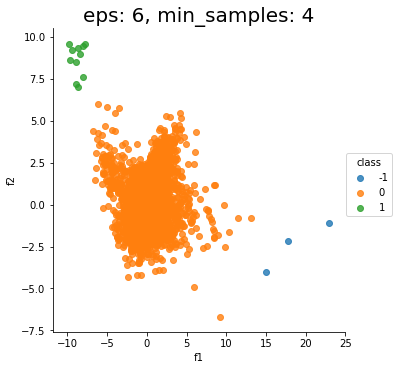

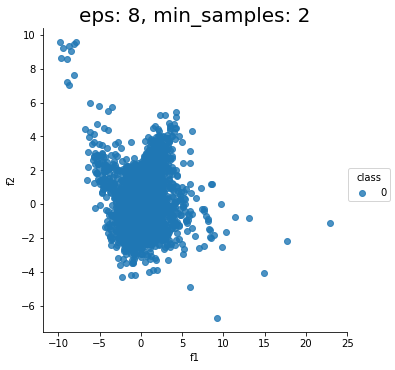

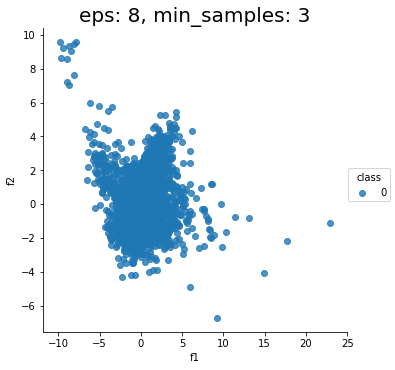

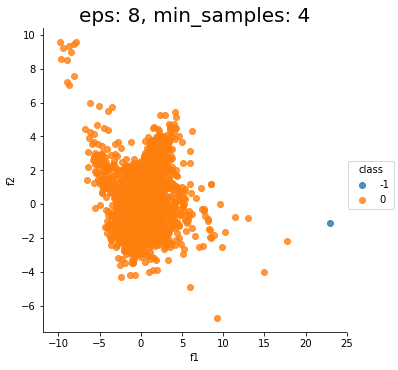

In [20]:
for i in range(2,9,2):
    for j in range(2,5):
        dbs=DBSCAN(eps=i,min_samples=j)
        c=dbs.fit_predict(data_scaled)
        d_temp=pd.DataFrame(data_pca,columns=['f1','f2'])
        d_temp['class']=c
        sns.lmplot(data=d_temp,x='f1',y='f2',fit_reg=False,hue='class')
        plt.title('eps: %d, min_samples: %d' %(i,j),fontsize=20)

**From what we get, we can see that when (`eps`, `min_samples`) is (4,3) or (4,4), the resulting cluster seems to be most reasonable. As we can see, although it is quite different from the result of the other two clustering algorithm, the result is restricted to 3 clusters and it also picks out the outliers from both upper left-hand side and lower right-hand side and leaves the big chunk of samples as separate class in the PCA component space. Therefore, compared to other parameters, when (`eps`, `min_samples`) is (4,3) or (4,4), the result is more semantically meaningful.**

### Dendrogram

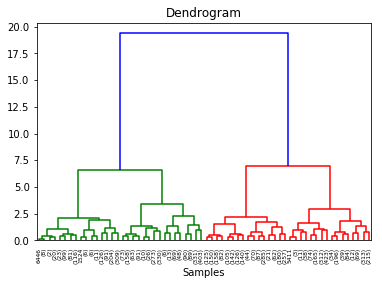

In [21]:
w=ward(data['X'])
dendrogram(w,p=5,no_plot=False,truncate_mode='level')
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.show()

**From the plotted dendrogram, it is obvious that the samples can be devided into two clusters and the "distance" of those two big clusters is way more than any other two clusters.**

## Task 2.2

### KMeans for outlier detection

In [22]:
data_scaled=StandardScaler().fit_transform(data['X'])
labels=data['y'].ravel()
result_dic={}
n_cluster=[]
n_init=[]
ari_list=[]
for i in range(2,16):
    for j in [10,20,30]:
        km=KMeans(n_clusters=i,n_init=j,random_state=0)
        c=km.fit_predict(data_scaled)
        ari=adjusted_rand_score(labels,c)
        n_cluster.append(i)
        n_init.append('%d inits'%j)
        ari_list.append(ari)
result_dic['ARI']=ari_list
result_dic['n_clusters']=n_cluster
result_dic['n_inits']=n_init
ari_result_kmeans=pd.DataFrame(result_dic)

**We then want to see how mean ARI with different number of initializations changes with number of clusters.**

In [23]:
df_ari_km=[]
for group,frame in ari_result_kmeans.groupby('n_clusters'):
    df_ari_km.append([group,frame['ARI'].mean()])
df_ari_km=pd.DataFrame(df_ari_km,columns=['n_clusters','mean ARI'])
df_ari_km.set_index('n_clusters')

mean ARI
n_clusters          
2          -0.053347
3          -0.006816
4           0.001947
5          -0.004118
6           0.008196
7           0.011495
8           0.014229
9           0.018722
10          0.015884
11          0.012591
12          0.012667
13          0.010157
14          0.009393
15          0.008428

**As we can see, ARI is the highest when number of clusters is 9. The mean ARI for different number of initializations is 0.018722.**

In [24]:
result_dic={}
n_cluster=[]
n_init=[]
nmi_list=[]
for i in range(2,16):
    for j in [10,20,30]:
        km=KMeans(n_clusters=i,n_init=j,random_state=0)
        c=km.fit_predict(data_scaled)
        nmi=normalized_mutual_info_score(labels,c)
        n_cluster.append(i)
        n_init.append('%d inits'%j)
        nmi_list.append(nmi)
result_dic['NMI']=nmi_list
result_dic['n_clusters']=n_cluster
result_dic['n_init']=n_init
nmi_result_kmeans=pd.DataFrame(result_dic)

In [25]:
df_nmi_km=[]
for group,frame in nmi_result_kmeans.groupby('n_clusters'):
    df_nmi_km.append([group,frame['NMI'].mean()])
df_nmi_km=pd.DataFrame(df_nmi_km,columns=['n_clusters','mean NMI'])
df_nmi_km.set_index('n_clusters')

mean NMI
n_clusters          
2           0.025924
3           0.068163
4           0.048046
5           0.051643
6           0.058438
7           0.080352
8           0.072897
9           0.080047
10          0.078272
11          0.076754
12          0.075368
13          0.073586
14          0.074440
15          0.076278

**NMI is the highest when number of clusters is 7. The mean NMI for different number of initializations is 0.080352.**

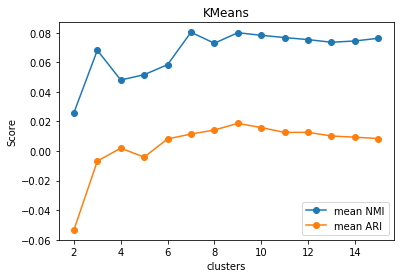

In [26]:
fig,ax=plt.subplots()
ax.plot(df_nmi_km['n_clusters'],df_nmi_km['mean NMI'],'o-',label='mean NMI')
ax.plot(df_ari_km['n_clusters'],df_ari_km['mean ARI'],'o-',label='mean ARI')
ax.set_xlabel('clusters');ax.set_ylabel('Score')
ax.set_title('KMeans')
ax.legend()

**As we can see, for KMeans, `mean NMI` and `mean ARI` are the highest when number of clusters is 7 and 9, respectively. One thing to notice is that the scores are low when the number of clusters is set to be 2 even it is the true number of classes. One possible explaination is that although `NMI` and `ARI` penalize large number of clusters, as the number of clusters grows larger, those clusters are more likely to be a subparition of one of the true class, therefore increase the score.**

### Agglomerative Clustering for outlier detection

In [27]:
data_scaled=StandardScaler().fit_transform(data['X'])
labels=data['y'].ravel()
result_dic={}
n_cluster=[]
ari_list=[]
for i in range(2,11):
    agg_cls=AgglomerativeClustering(n_clusters=i)
    c=agg_cls.fit_predict(data_scaled)
    ari=adjusted_rand_score(labels,c)
    n_cluster.append(i)
    ari_list.append(ari)
result_dic['ARI']=ari_list
result_dic['n_clusters']=n_cluster
ari_result_agg=pd.DataFrame(result_dic)
ari_result_agg.set_index('n_clusters')

ARI
n_clusters          
2          -0.064129
3          -0.048912
4           0.020883
5           0.018451
6           0.049335
7           0.021409
8           0.021167
9           0.015269
10          0.014612

**As we can see, ARI is the highest when number of clusters is 6. When there are 6 clusters ARI is 0.049335.**

In [28]:
result_dic={}
n_cluster=[]
nmi_list=[]
for i in range(2,11):
    agg_cls=AgglomerativeClustering(n_clusters=i)
    c=agg_cls.fit_predict(data_scaled)
    nmi=normalized_mutual_info_score(labels,c)
    n_cluster.append(i)
    nmi_list.append(nmi)
result_dic['NMI']=nmi_list
result_dic['n_clusters']=n_cluster
nmi_result_agg=pd.DataFrame(result_dic)
nmi_result_agg.set_index('n_clusters')

NMI
n_clusters          
2           0.016969
3           0.029024
4           0.035433
5           0.036907
6           0.103761
7           0.089634
8           0.089163
9           0.089617
10          0.088691

**NMI is the highest when number of clusters is 6. When there are 6 clusters, NMI is 0.103761.**

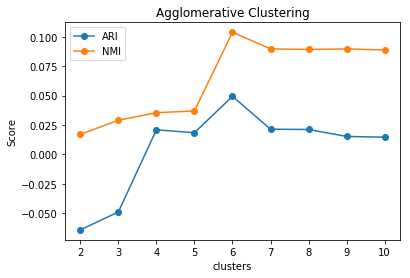

In [29]:
fig,ax=plt.subplots()
ax.plot(ari_result_agg['n_clusters'],ari_result_agg['ARI'],'o-',label='ARI')
ax.plot(nmi_result_agg['n_clusters'],nmi_result_agg['NMI'],'o-',label='NMI')
ax.set_xlabel('clusters');ax.set_ylabel('Score')
ax.set_title('Agglomerative Clustering')
ax.legend()

**Same as before, although it seems unreasonable that 6 clusters will generate the highest score, and the scores are low when the number of clusters is set to be 2 even it is the true number of classes, it is possible that the union of some sub-partitions happen to  be quite consistant with the ground true label classes.**

### DBSCAN

In [61]:
result_dic={}
eps_list=[]
min_sample_list=[]
ari_list=[]
for i in range(2,9,2):
    for j in range(2,5):
        dbs=DBSCAN(eps=i,min_samples=j)
        c=dbs.fit_predict(data_scaled)
        eps_list.append(i)
        min_sample_list.append(j)
        ari=adjusted_rand_score(c,labels)
        ari_list.append(ari)
result_dic['epsilon']=eps_list
result_dic['min samples']=min_sample_list
result_dic['ARI']=ari_list
ari_dbscan=pd.DataFrame(result_dic)[['epsilon','min samples','ARI']]
ari_dbscan

epsilon  min samples       ARI
0         2            2  0.035462
1         2            3  0.035451
2         2            4  0.035119
3         4            2  0.032119
4         4            3  0.032120
5         4            4  0.032120
6         6            2  0.033624
7         6            3  0.033624
8         6            4  0.033624
9         8            2  0.000000
10        8            3  0.000000
11        8            4 -0.000255

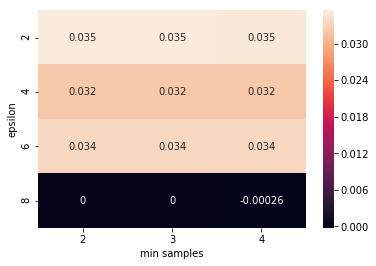

In [31]:
sns.heatmap(ari_dbscan.pivot_table('ARI','epsilon','min samples'),annot=True)

**ARI is the highest: 0.035462, when `epsilon` is 2 and `min_samples` is 2.**

In [32]:
result_dic={}
eps_list=[]
min_sample_list=[]
nmi_list=[]
for i in range(2,9,2):
    for j in range(2,5):
        dbs=DBSCAN(eps=i,min_samples=j)
        c=dbs.fit_predict(data_scaled)
        eps_list.append(i)
        min_sample_list.append(j)
        nmi=normalized_mutual_info_score(c,labels)
        nmi_list.append(nmi)
result_dic['epsilon']=eps_list
result_dic['min samples']=min_sample_list
result_dic['NMI']=nmi_list
nmi_dbscan=pd.DataFrame(result_dic)[['epsilon','min samples','NMI']]
nmi_dbscan

epsilon  min samples           NMI
0         2            2  3.456829e-02
1         2            3  3.404544e-02
2         2            4  2.712821e-02
3         4            2  5.503559e-02
4         4            3  5.588446e-02
5         4            4  5.588446e-02
6         6            2  6.366257e-02
7         6            3  6.366257e-02
8         6            4  6.366257e-02
9         8            2 -8.326673e-07
10        8            3 -8.326673e-07
11        8            4  5.620122e-04

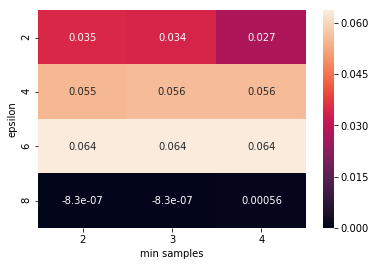

In [33]:
sns.heatmap(nmi_dbscan.pivot_table('NMI','epsilon','min samples'),annot=True)

**NMI is the highest: 0.06366257, when `epsilon` is 6 and `min_samples` is 2.**

**When the `epsilon` is 2 and `min_samples` is 2, the result has best ARI. When the `epsilon` is 6 and `min_samples` is 2, the result has the best NMI. Both results seem to pick out two clusters, one upper left-hand cluster and one lower right-hand cluster, as outliers and also pick out the majority cluster in the PCA component space. This result is quite different from those of the other two algorithms, but the partition seems to be reasonabel.**

# Task3

## Task3.1

In [34]:
data_scaled=StandardScaler().fit_transform(data['X'])
pca_data=PCA(n_components=2).fit_transform(data_scaled)

**First let's check what the outlier detection would be for different assumptions of the outlier proportion (0.01, 0.05, 0.1).**

### Elliptic Envelope

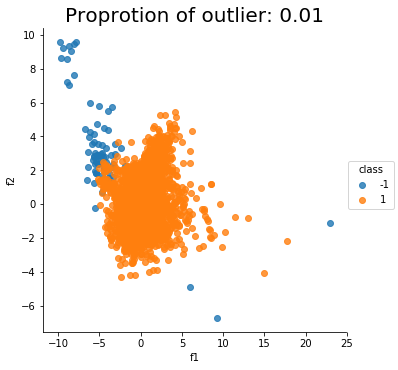

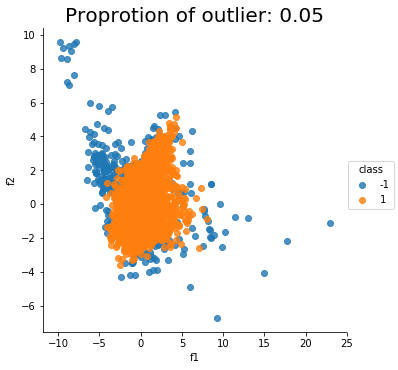

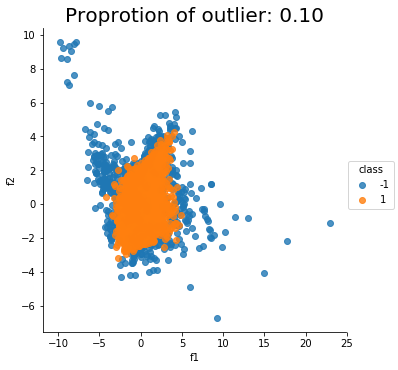

In [35]:
for i in [0.01,0.05,0.1]:
    ee=EllipticEnvelope(contamination=i).fit(data_scaled)
    pred=ee.predict(data_scaled)
    df_EE=pd.DataFrame(data_pca,columns=['f1','f2'])
    df_EE['class']=pred
    sns.lmplot(x='f1',y='f2',data=df_EE,fit_reg=False,hue='class')
    plt.title('Proprotion of outlier: %.2f'%i,fontsize=20)

###  OneClassSVM

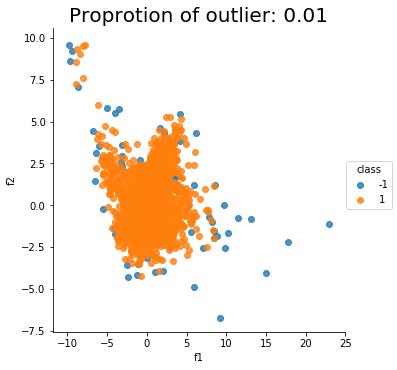

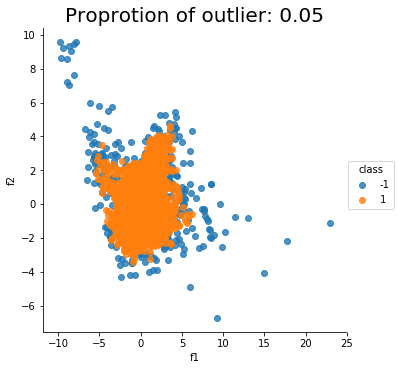

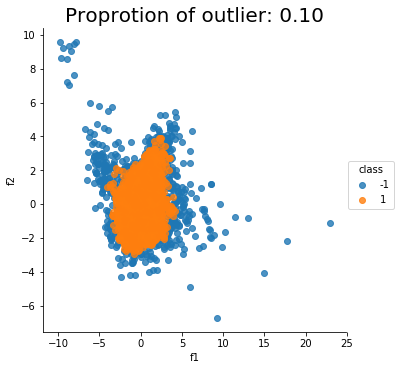

In [36]:
for i in [0.01,0.05,0.1]:
    oneclass=OneClassSVM(nu=i).fit(data_scaled)
    pred=oneclass.predict(data_scaled)
    df_oneclass=pd.DataFrame(data_pca,columns=['f1','f2'])
    df_oneclass['class']=pred
    sns.lmplot(x='f1',y='f2',data=df_oneclass,fit_reg=False,hue='class')
    plt.title('Proprotion of outlier: %.2f'%i,fontsize=20)

### Isolation Forest

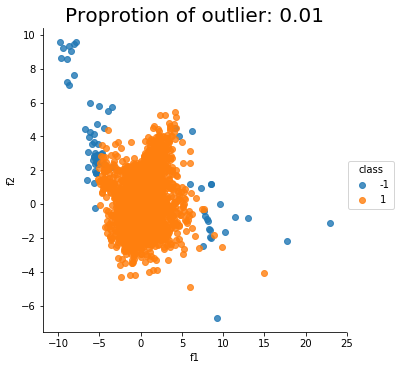

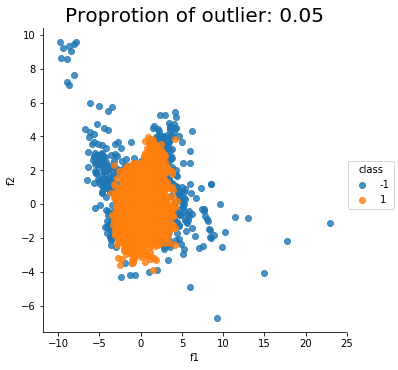

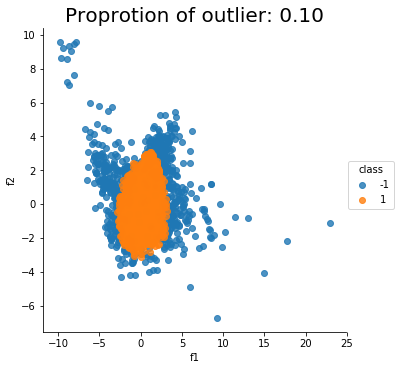

In [37]:
for i in [0.01,0.05,0.1]:
    iso_f=IsolationForest(n_estimators=500,contamination=i).fit(data_scaled)
    pred=iso_f.predict(data_scaled)
    df_iso=pd.DataFrame(data_pca,columns=['f1','f2'])
    df_iso['class']=pred
    sns.lmplot(x='f1',y='f2',data=df_iso,fit_reg=False,hue='class')
    plt.title('Proprotion of outlier: %.2f'%i,fontsize=20)

**Suppose we knew the proportion of outliers, let's say, 0.01. Without knowing the ground truth, the result is as follows:**

Text(0,0.5,'f2')

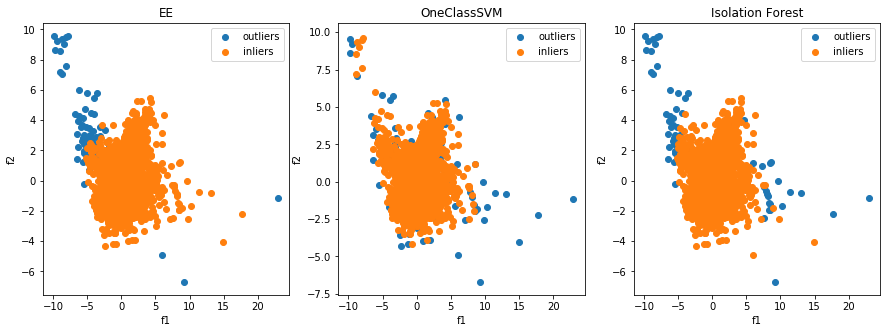

In [38]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ee=EllipticEnvelope(contamination=0.01).fit(data_scaled)
pred=ee.predict(data_scaled);df_EE=pd.DataFrame(data_pca,columns=['f1','f2']);df_EE['class']=pred
df_temp1=df_EE[df_EE['class']==-1];df_temp2=df_EE[df_EE['class']==1]
ax[0].scatter(df_temp1['f1'],df_temp1['f2'],label='outliers')
ax[0].scatter(df_temp2['f1'],df_temp2['f2'],label='inliers');ax[0].legend()
ax[0].set_title('EE');ax[0].set_xlabel('f1');ax[0].set_ylabel('f2')
oneclass=OneClassSVM(nu=0.01).fit(data_scaled);pred=oneclass.predict(data_scaled)
df_oneclass=pd.DataFrame(data_pca,columns=['f1','f2']);df_oneclass['class']=pred
df_temp1=df_oneclass[df_oneclass['class']==-1];df_temp2=df_oneclass[df_oneclass['class']==1]
ax[1].scatter(df_temp1['f1'],df_temp1['f2'],label='outliers')
ax[1].scatter(df_temp2['f1'],df_temp2['f2'],label='inliers');ax[1].legend()
ax[1].set_title('OneClassSVM');ax[1].set_xlabel('f1');ax[1].set_ylabel('f2')
iso_f=IsolationForest(n_estimators=800,contamination=0.01).fit(data_scaled);pred=iso_f.predict(data_scaled)
df_iso=pd.DataFrame(data_pca,columns=['f1','f2']);df_iso['class']=pred
df_temp1=df_iso[df_iso['class']==-1];df_temp2=df_iso[df_iso['class']==1]
ax[2].scatter(df_temp1['f1'],df_temp1['f2'],label='outliers')
ax[2].scatter(df_temp2['f1'],df_temp2['f2'],label='inliers');ax[2].legend()
ax[2].set_title('Isolation Forest');ax[2].set_xlabel('f1');ax[2].set_ylabel('f2')

**Based on what we have got, it is difficult to tell which result is the best, at least from the plotting of PCA components. One reason would be that PCA is basically projecting the data from the original space to a subspace. Some information gets lost in this process. Therefore, what looks reasonable in the PCA component space does NOT necessarily make sense in the original space. In addition, there could be several ways to define what is outliers and what is not based on context of the data. One approach that is not good might turn out to be reasonabe in other applications.**

## Task3.2

### ROC_AUC

In [39]:
test_label=[-1 if i==1 else 1 for i in labels ]
ee_auc=roc_auc_score(test_label,ee.decision_function(data_scaled))
oneclass_auc=roc_auc_score(test_label,oneclass.decision_function(data_scaled))
iso_auc=roc_auc_score(test_label,iso_f.decision_function(data_scaled))
print('AUC of Elliptic Envelop is %.5f'%ee_auc)
print('AUC of One-class SVM is %.5f'%oneclass_auc)
print('AUC of Isolation Forest is %.5f'%iso_auc)

AUC of Elliptic Envelop is 0.91895
AUC of One-class SVM is 0.42745
AUC of Isolation Forest is 0.81203


### Average Precision

In [40]:
ee_prec=average_precision_score(test_label,ee.decision_function(data_scaled))
oneclass_prec=average_precision_score(test_label,oneclass.decision_function(data_scaled))
iso_prec=average_precision_score(test_label,iso_f.decision_function(data_scaled))
print('Average Precision of Elliptic Envelop is %.5f'%ee_prec)
print('Average Precision of One-class SVM is %.5f'%oneclass_prec)
print('Average Precision of Isolation Forest is %.5f'%iso_prec)

Average Precision of Elliptic Envelop is 0.99316
Average Precision of One-class SVM is 0.88045
Average Precision of Isolation Forest is 0.98163


### Comparison of Quality

**In order to make comparison, we computed the ARI and NMI score of EllipticEnvelope, OneClassSVM and IsolationForest.**

#### ARI

In [41]:
ee_ari=adjusted_rand_score(labels,df_EE['class'])
oneclass_ari=adjusted_rand_score(labels,df_oneclass['class'])
iso_ari=adjusted_rand_score(labels,df_iso['class'])
print('The ARI score for EllipticEnvelope is %.5f'%ee_ari)
print('The ARI score for OneClassSVM is %.5f'%oneclass_ari)
print('The ARI score for IsolationForest is %.5f'%iso_ari)

The ARI score for EllipticEnvelope is 0.17646
The ARI score for OneClassSVM is 0.03460
The ARI score for IsolationForest is 0.12910


#### NMI

In [42]:
ee_nmi=normalized_mutual_info_score(labels,df_EE['class'])
oneclass_nmi=normalized_mutual_info_score(labels,df_oneclass['class'])
iso_nmi=normalized_mutual_info_score(labels,df_iso['class'])
print('The NMI score for EllipticEnvelope is %.5f'%ee_nmi)
print('The NMI score for OneClassSVM is %.5f'%oneclass_nmi)
print('The NMI score for IsolationForest is %.5f'%iso_nmi)

The NMI score for EllipticEnvelope is 0.15577
The NMI score for OneClassSVM is 0.00838
The NMI score for IsolationForest is 0.09078


**It can be seen that the performance of EllipticEnvelope, OneClassSVM and IsolationForest measured by NMI and ARI is better than those of Task2 when the number of clusters is set to be 2. What's more, the performance of EllipticEnvelope and IsolationForest is mostly better than the highest score of the three algorithms in Task2. Therefore, it is relatively safe to say that EllipticEnvelope, OneClassSVM and IsolationForest are better, especially EllipticEnvelope and IsolationForest.**

# Task4

### Logistic Regression

In [43]:
data=loadmat('annthyroid.mat')
X_train,X_test,y_train,y_test=train_test_split(data['X'],data['y'],stratify=data['y'],random_state=0)
pipe_lr0=make_pipeline(StandardScaler(),LogisticRegression())
param_grid_lr0={'logisticregression__C':[round(i,2) for i in np.logspace(0,2,12)]}
grid_lr_auc0=GridSearchCV(pipe_lr0,param_grid=param_grid_lr0,cv=5,scoring='roc_auc').fit(X_train,y_train)
grid_lr_prec0=GridSearchCV(pipe_lr0,param_grid=param_grid_lr0,cv=5,scoring='average_precision').fit(X_train,y_train)

In [44]:
pipe_lr1=make_pipeline(StandardScaler(),LogisticRegression(class_weight='balanced'))
grid_lr_auc1=GridSearchCV(pipe_lr1,param_grid=param_grid_lr0,cv=5,scoring='roc_auc').fit(X_train,y_train)
grid_lr_prec1=GridSearchCV(pipe_lr1,param_grid=param_grid_lr0,cv=5,scoring='average_precision').fit(X_train,y_train)

Text(0.5,1,'ROC AUC for Logistic Regression')

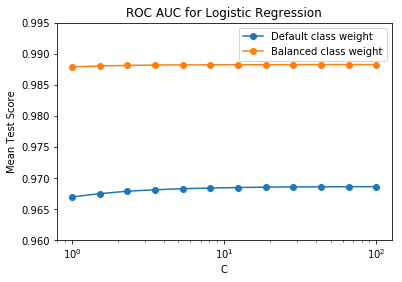

In [45]:
fig,ax=plt.subplots()
ax.plot(np.logspace(0,2,12),grid_lr_auc0.cv_results_['mean_test_score'],'-o',label='Default class weight')
ax.plot(np.logspace(0,2,12),grid_lr_auc1.cv_results_['mean_test_score'],'-o',label='Balanced class weight')
ax.set_xscale('log');ax.set_ylim(0.96,0.995);ax.legend()
ax.set_xlabel('C');ax.set_ylabel('Mean Test Score')
ax.set_title('ROC AUC for Logistic Regression')

Text(0.5,1,'Average Precision for Logistic Regression')

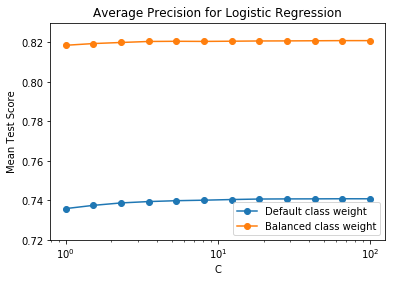

In [46]:
fig,ax=plt.subplots()
ax.plot(np.logspace(0,2,12),grid_lr_prec0.cv_results_['mean_test_score'],'-o',label='Default class weight')
ax.plot(np.logspace(0,2,12),grid_lr_prec1.cv_results_['mean_test_score'],'-o',label='Balanced class weight')
ax.set_xscale('log');ax.legend()
ax.set_xlabel('C');ax.set_ylim(0.72,0.83);ax.set_ylabel('Mean Test Score')
ax.set_title('Average Precision for Logistic Regression')

**We can see that for Logistic Regression, changing the class weight to 'balanced' will improve both `ROC AUC` and `Average Precision`. **

**We then test the model using the test data:**

In [47]:
auc_score=grid_lr_auc1.score(X_test,y_test)
avg_prec_score=grid_lr_prec1.score(X_test,y_test)
print('The ROC-AUC test score for Logistic Regression with Balanced class weight is %.5f'%auc_score)
print('The Average Precision test score for Logistic Regression with Balanced class weight is %.5f'%avg_prec_score)

The ROC-AUC test score for Logistic Regression with Balanced class weight is 0.99101
The Average Precision test score for Logistic Regression with Balanced class weight is 0.85042


**Furthermore, we want to explore how `Mean Test Score` would change with class weight and `C`.**

In [48]:
pipe_lr=make_pipeline(StandardScaler(),LogisticRegression())
param_grid_lr={'logisticregression__C':[round(i,2) for i in np.logspace(0,2,12)],
               'logisticregression__class_weight':[{0:1,1:1},{0:1,1:3},{0:1,1:5},{0:1,1:7},{0:1,1:10},{0:1,1:100},{0:1,1:200},{0:1,1:500}]}

In [49]:
grid_lr_auc=GridSearchCV(pipe_lr,param_grid=param_grid_lr,cv=5,scoring='roc_auc')
grid_lr_auc.fit(X_train,y_train)
lr_summary_auc=pd.DataFrame(grid_lr_auc.cv_results_)
lr_summary_auc['param_logisticregression__class_weight']=lr_summary_auc['param_logisticregression__class_weight'].apply(
                                                        lambda x:round(x[1]/x[0],2))
lr_summary_auc['class 1 : class 0']=lr_summary_auc['param_logisticregression__class_weight']
summary_lr_auc=lr_summary_auc.pivot_table('mean_test_score','class 1 : class 0','param_logisticregression__C')

In [50]:
grid_lr_prec=GridSearchCV(pipe_lr,param_grid=param_grid_lr,cv=5,scoring='average_precision')
grid_lr_prec.fit(X_train,y_train)
lr_summary_prec=pd.DataFrame(grid_lr_prec.cv_results_)
lr_summary_prec['param_logisticregression__class_weight']=lr_summary_prec['param_logisticregression__class_weight'].apply(
                                                        lambda x:round(x[1]/x[0],2))
lr_summary_prec['class 1 : class 0']=lr_summary_prec['param_logisticregression__class_weight']
summary_lr_prec=lr_summary_prec.pivot_table('mean_test_score','class 1 : class 0','param_logisticregression__C')

Text(0.5,1,'AUC for Logistic Regression')

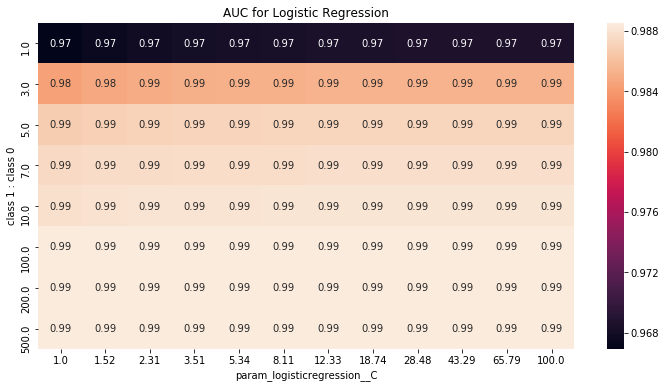

In [51]:
fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(summary_lr_auc,annot=True,ax=ax)
plt.title('AUC for Logistic Regression')

Text(0.5,1,'Average Precision for Logistic Regression')

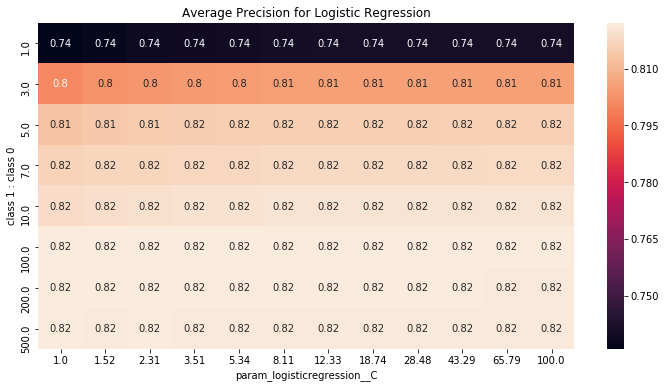

In [52]:
fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(summary_lr_prec,annot=True,ax=ax)
plt.title('Average Precision for Logistic Regression')

**We can see that basically both `ROC-AUC` and `Average Precision` increase with the class weight of class 1 and the scores remain the same when the ratio of weight between class 1 and class 0 reaches 100 no matter what C takes.**

### Random Forest

In [53]:
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf1=RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=0)
param_grid_rf={'max_depth':range(2,19,2),
               'class_weight':[{0:1,1:1},{0:1,1:3},{0:1,1:5},{0:1,1:7},{0:1,1:10},{0:1,1:100}]}

In [54]:
param_grid_rf0={'max_depth':range(2,19,2)}
grid_rf_auc0=GridSearchCV(rf,param_grid=param_grid_rf0,cv=5,scoring='roc_auc').fit(X_train,y_train)
grid_rf_prec0=GridSearchCV(rf,param_grid=param_grid_rf0,cv=5,scoring='average_precision').fit(X_train,y_train)
grid_rf_auc1=GridSearchCV(rf1,param_grid=param_grid_rf0,cv=5,scoring='roc_auc').fit(X_train,y_train)
grid_rf_prec1=GridSearchCV(rf1,param_grid=param_grid_rf0,cv=5,scoring='average_precision').fit(X_train,y_train)

Text(0.5,1,'ROC AUC for Rnadom Forest')

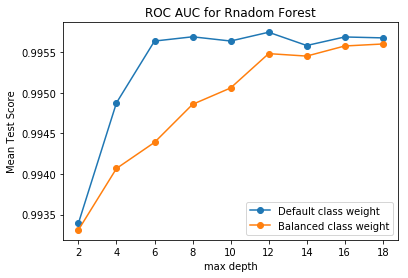

In [55]:
fig,ax=plt.subplots()
ax.plot(range(2,19,2),grid_rf_auc0.cv_results_['mean_test_score'],'o-',label='Default class weight')
ax.plot(range(2,19,2),grid_rf_auc1.cv_results_['mean_test_score'],'o-',label='Balanced class weight')
ax.set_xlabel('max depth');ax.set_ylabel('Mean Test Score')
ax.legend();ax.set_title('ROC AUC for Rnadom Forest')

Text(0.5,1,'Average Precision for Rnadom Forest')

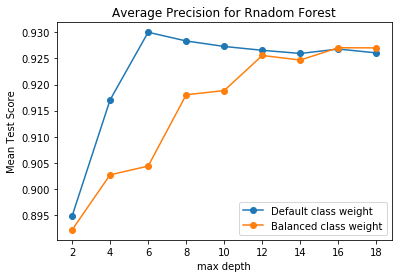

In [56]:
fig,ax=plt.subplots()
ax.plot(range(2,19,2),grid_rf_prec0.cv_results_['mean_test_score'],'o-',label='Default class weight')
ax.plot(range(2,19,2),grid_rf_prec1.cv_results_['mean_test_score'],'o-',label='Balanced class weight')
ax.set_xlabel('max depth');ax.set_ylabel('Mean Test Score')
ax.legend();ax.set_title('Average Precision for Rnadom Forest')

**We can see that for Random Forest, changing the class weight to 'balanced' doesn't help improve any of ROC AUC or Average Precision. Actually it would be better without balanced classes.**

**We then test the model using the test data:**

In [57]:
auc_score=grid_rf_auc0.score(X_test,y_test)
avg_prec_score=grid_rf_prec0.score(X_test,y_test)
print('The ROC-AUC test score for Random Forest with Default class weight is %.5f'%auc_score)
print('The Average Precision test score for Random Forest with Default class weight is %.5f'%avg_prec_score)

The ROC-AUC test score for Random Forest with Default class weight is 0.99533
The Average Precision test score for Random Forest with Default class weight is 0.94738


**Furthermore, we want to explore how Mean Test Score would change with class weight and C**

Text(0.5,1,'AUC for Random Forest')

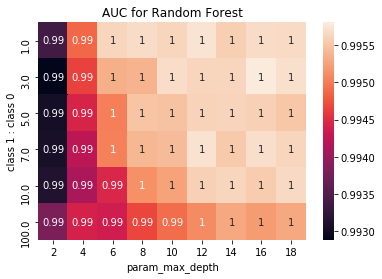

In [58]:
grid_rf_auc=GridSearchCV(rf,param_grid=param_grid_rf,cv=5,scoring='roc_auc').fit(X_train,y_train)
df_rf_auc=pd.DataFrame(grid_rf_auc.cv_results_)
df_rf_auc['class 1 : class 0']=df_rf_auc['param_class_weight'].apply(
                                        lambda x:x[1]/x[0])
rf_summary_auc=df_rf_auc.pivot_table('mean_test_score','class 1 : class 0','param_max_depth')
sns.heatmap(rf_summary_auc,annot=True)
plt.title('AUC for Random Forest')

Text(0.5,1,'Average Precision for Random Forest')

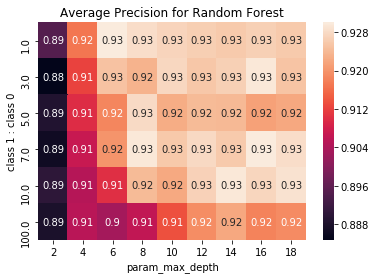

In [59]:
grid_rf_prec=GridSearchCV(rf,param_grid=param_grid_rf,cv=5,scoring='average_precision').fit(X_train,y_train)
df_rf_prec=pd.DataFrame(grid_rf_prec.cv_results_)
df_rf_prec['class 1 : class 0']=df_rf_prec['param_class_weight'].apply(
                                        lambda x:x[1]/x[0])
rf_summary_prec=df_rf_prec.pivot_table('mean_test_score','class 1 : class 0','param_max_depth')
sns.heatmap(rf_summary_prec,annot=True)
plt.title('Average Precision for Random Forest')

**From the plot, we can see that changing the class weight does not help improve the result.**